In [1]:
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

from shapely.geometry import LineString, MultiLineString, Polygon

from l5kit_conflict.pickle.io import load_potential_conflict_pickle, report_AVHV_conflicts, report_HVHV_conflicts
from l5kit_conflict.filter.helper import multi2singleLineString, multiline_to_single_line
from l5kit_conflict.analysis.trajectory import Trajectory
from l5kit_conflict.analysis.conflict import Conflict

np.set_printoptions(suppress=True)
plt.style.use("ggplot")

D:\github\lyft_intersection\l5kit\l5kit\l5kit\dataset\select_agents.py:31: UserWarning: Windows detected. BLOSC_NOLOCK has not been set as it causes memory leaks on Windows.However, writing the mask with this config may be inconsistent.
  warnings.warn(


## `Load pickles`

In [2]:
ls "pickle_backup/conflict_identification"

 Volume in drive D is Develop
 Volume Serial Number is 5086-BE48

 Directory of D:\github\lyft_intersection\extract_intersections\pickle_backup\conflict_identification

02/04/2024  18:23    <DIR>          .
02/04/2024  18:23    <DIR>          ..
25/03/2024  01:49         8,974,604 AVHV_conflict_train2_10.0.pkl
25/03/2024  00:17         3,808,309 AVHV_conflict_train2_5.0.pkl
24/03/2024  19:27           816,375 AVHV_conflict_validate_10.0.pkl
24/03/2024  19:26           316,219 AVHV_conflict_validate_5.0.pkl
02/04/2024  17:00           735,660 AVHV_conflict_validate_7.0.pkl
25/03/2024  01:49         3,854,539 HVHV_conflict_train2_10.0.pkl
25/03/2024  00:17         2,475,326 HVHV_conflict_train2_5.0.pkl
24/03/2024  19:27           432,304 HVHV_conflict_validate_10.0.pkl
24/03/2024  19:26           257,656 HVHV_conflict_validate_5.0.pkl
02/04/2024  17:00           562,634 HVHV_conflict_validate_7.0.pkl
              10 File(s)     22,233,626 bytes
               2 Dir(s)  203,837,870,080 b

In [3]:
# all the conflicts are identified in the train/validate dataset;
# and saved in the pickle binary files;

# the naming convention is that:
# - pair of vehicles in conflict: AVHV conflict or HVHV conflict;
# - dataset name: train2 or validate;
# - time difference threshold: 5s, 7s or 10s

delta_time = 10 # 10 seconds for now [April 3rd, meeting];
AVHV_val_conflict_dataset = load_potential_conflict_pickle(dataset_type="AVHV", dataset_name="validate", delta_time=delta_time)
HVHV_val_conflict_dataset = load_potential_conflict_pickle(dataset_type="HVHV", dataset_name="validate", delta_time=delta_time)

AVHV_train_conflict_dataset = load_potential_conflict_pickle(dataset_type="AVHV", dataset_name="train2", delta_time=delta_time)
HVHV_train_conflict_dataset = load_potential_conflict_pickle(dataset_type="HVHV", dataset_name="train2", delta_time=delta_time)

# report the sample sizes of each kind of conflict;
# report_AVHV_conflicts(AVHV_val_conflict_dataset)
# report_HVHV_conflicts(HVHV_val_conflict_dataset)

# report_AVHV_conflicts(AVHV_train_conflict_dataset)
# report_HVHV_conflicts(HVHV_train_conflict_dataset)

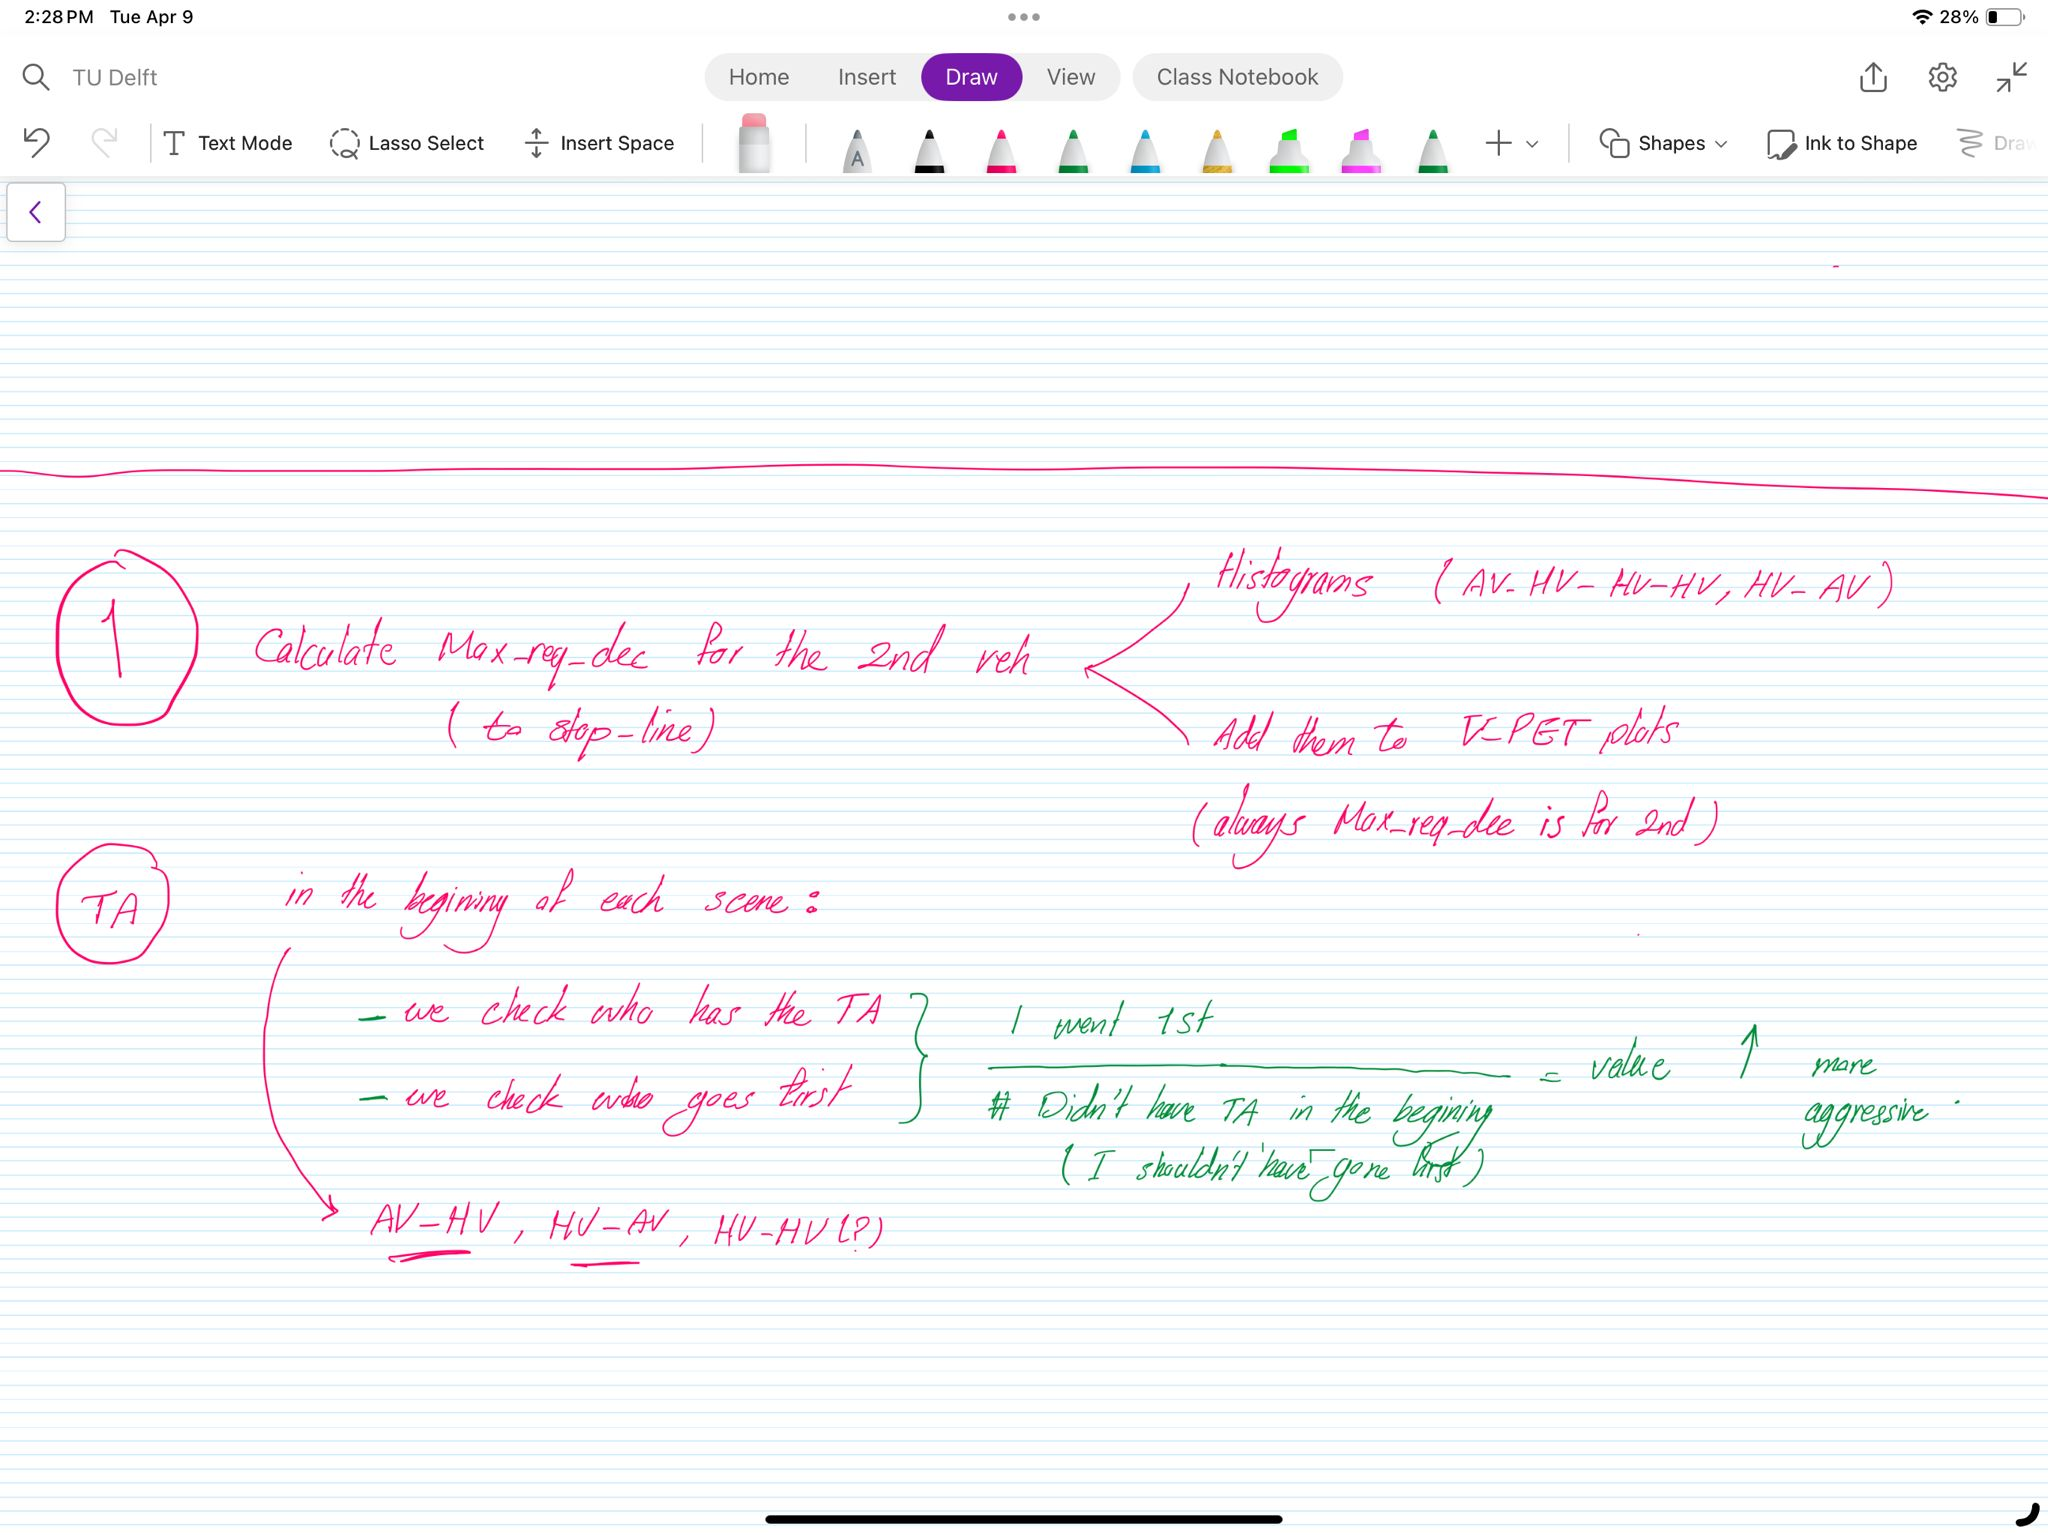

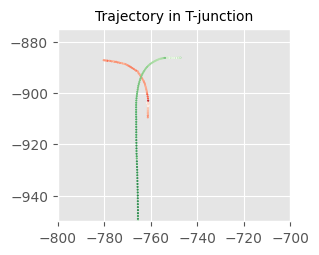

False

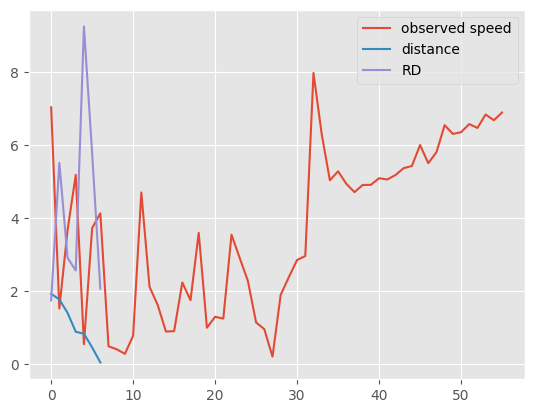

In [9]:
# dataset = AVHV_val_conflict_dataset
# for category in dataset.keys():
#     for direction in dataset[category].keys():
#         for index, conflict in enumerate(dataset[category][direction]):
#             conflict = list(conflict.values())[0]
#             conflict = Conflict(
#                 first_trajectory=conflict.first_agent_trajectory,
#                 second_trajectory=conflict.second_agent_trajectory,
#                 is_first_AV = True if conflict.first_agent_trajectory_id is None else False,
#                 is_second_AV = True if conflict.second_agent_trajectory_id is None else False,
#                 PET = conflict.delta_time,
#                 first_time_at_conflict = conflict.first_agent_conflict_time,
#                 second_time_at_conflict = conflict.second_agent_conflict_time,
#                 type=category,
#             )

conflict = HVHV_val_conflict_dataset["cross"]["turnleft&turnleft"][12]
conflict = list(conflict.values())[0]
conflict = Conflict(
    first_trajectory=conflict.first_agent_trajectory,
    second_trajectory=conflict.second_agent_trajectory,
    is_first_AV = True if conflict.first_agent_trajectory_id is None else False,
    is_second_AV = True if conflict.second_agent_trajectory_id is None else False,
    PET = conflict.delta_time,
    first_time_at_conflict = conflict.first_agent_conflict_time,
    second_time_at_conflict = conflict.second_agent_conflict_time,
    type="cross",
)
conflict.plot()
# print(conflict.maximum_required_deceleration, conflict.required_decelerations)
plt.plot(conflict.second_trajectory.v[(conflict.second_trajectory.t < conflict.second_time_at_conflict)[:-1]])
plt.plot(conflict.required_decelerations[1])
plt.plot(conflict.required_decelerations[0])
plt.legend(["observed speed", "distance", "RD"])
conflict.is_second_AV

## `Distributions`

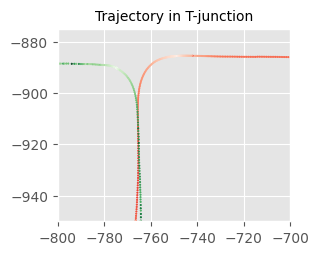

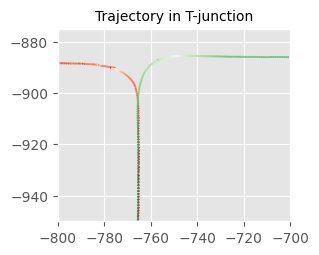

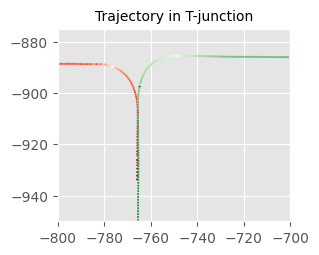

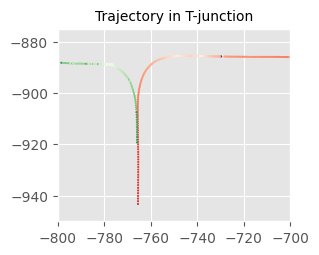

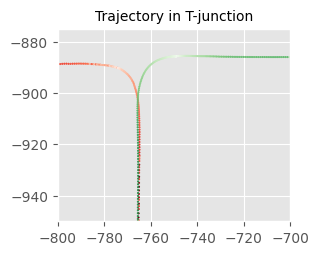

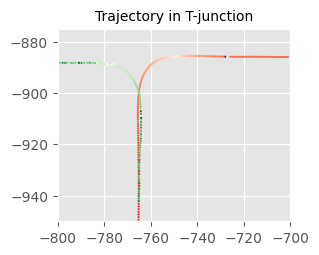

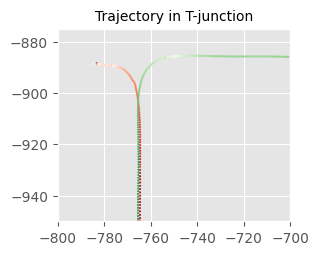

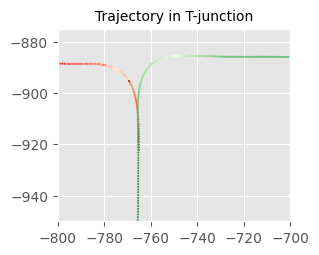

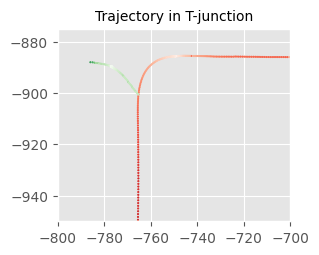

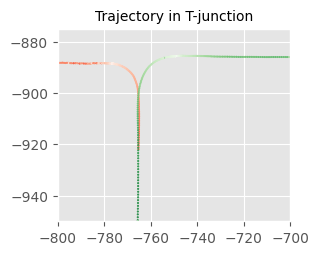

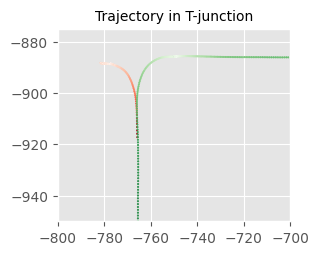

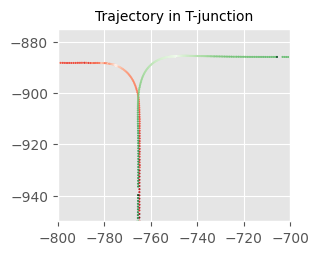

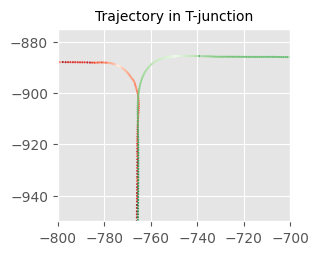

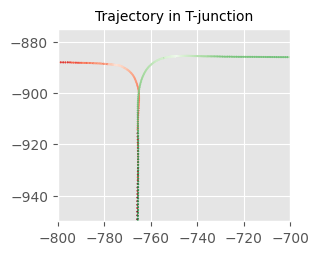

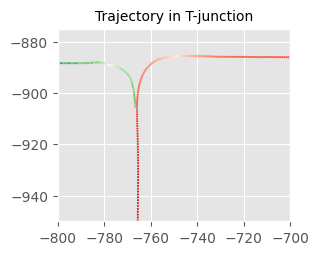

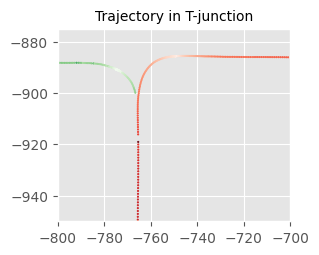

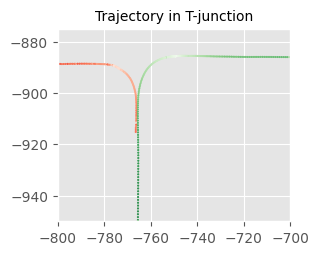

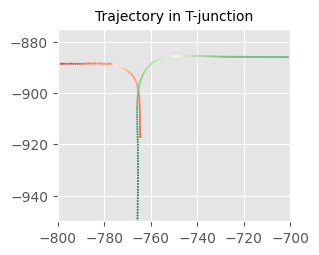

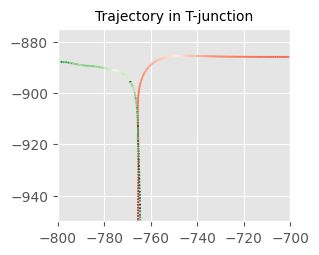

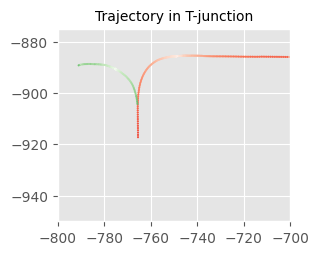

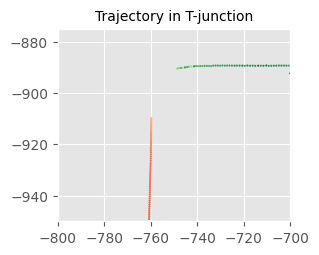

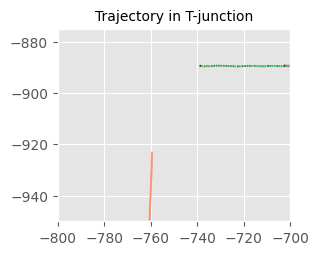

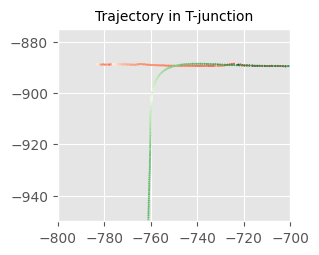

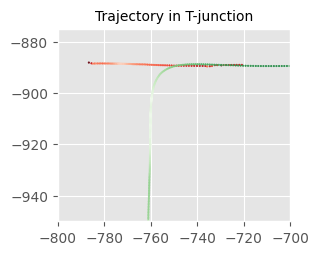

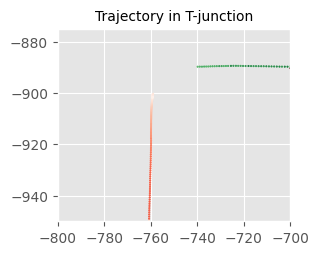

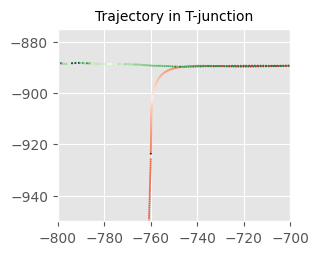

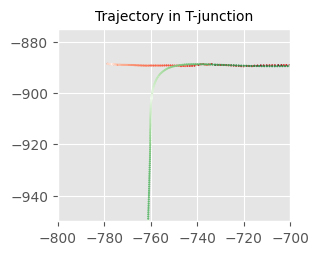

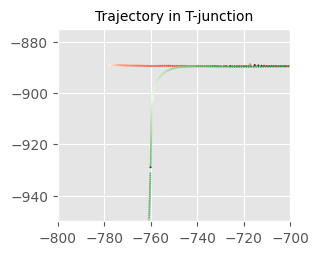

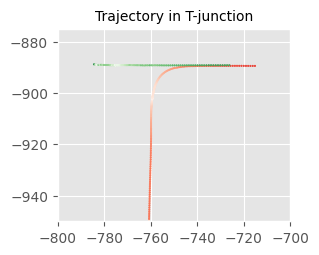

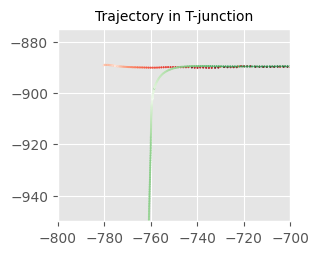

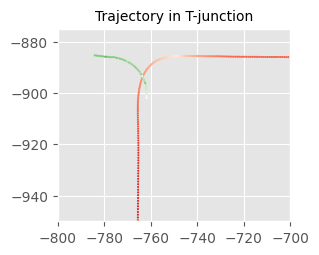

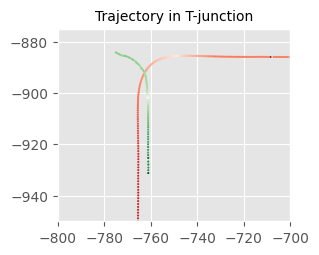

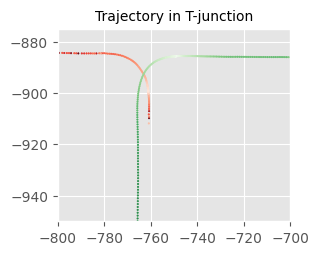

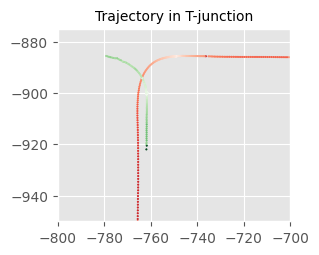

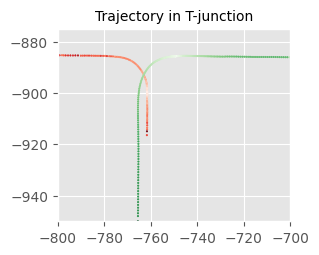

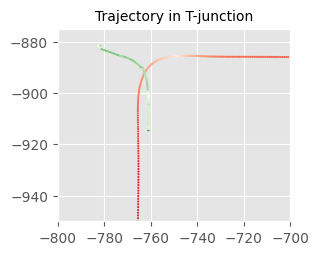

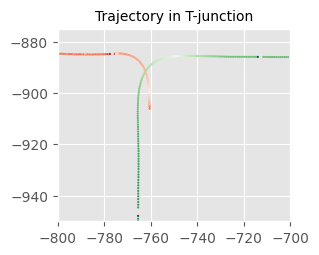

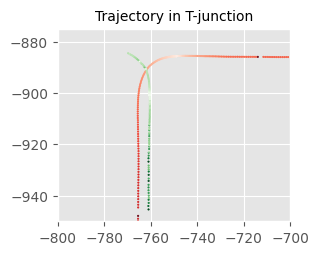

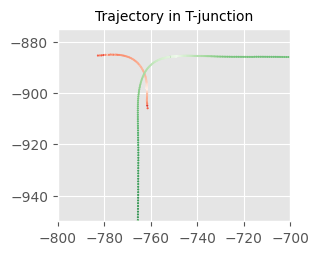

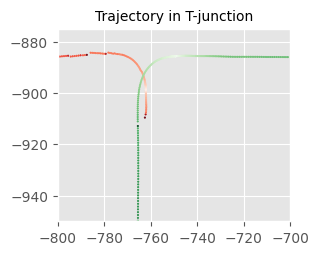

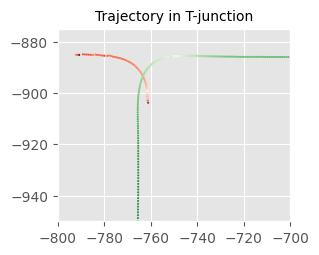

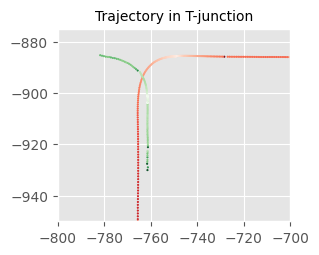

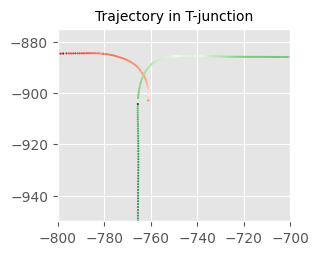

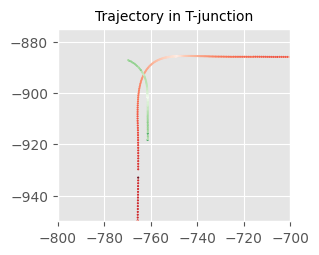

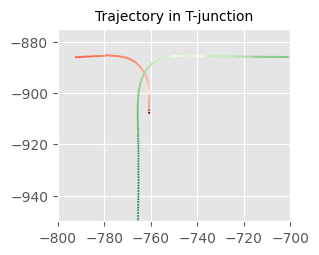

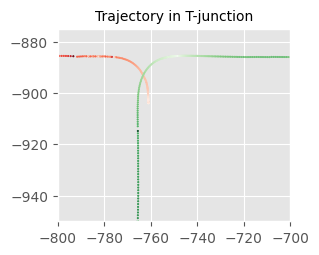

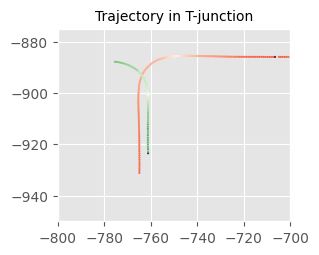

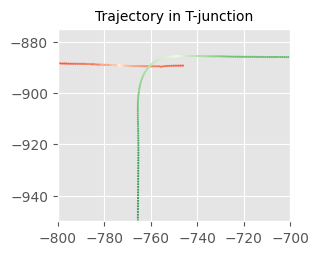

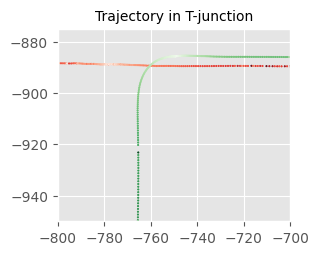

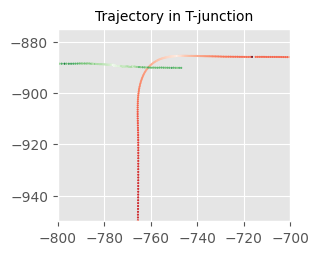

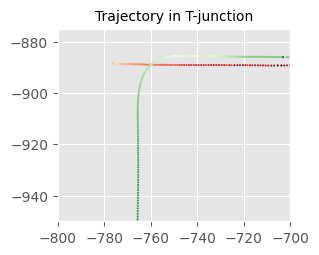

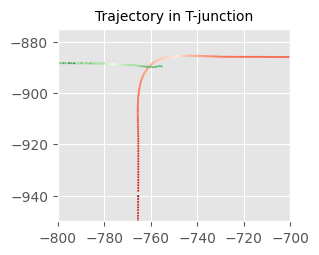

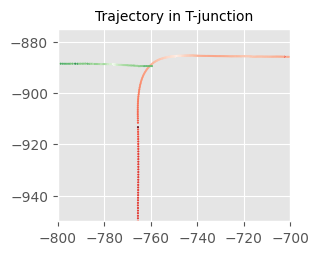

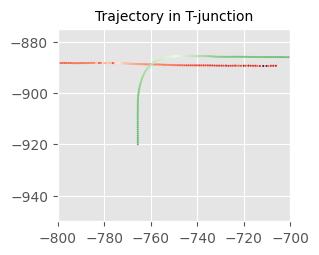

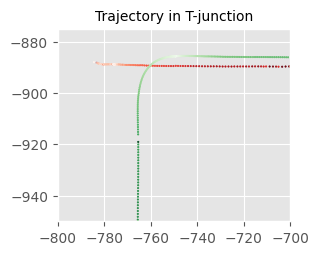

KeyboardInterrupt: 

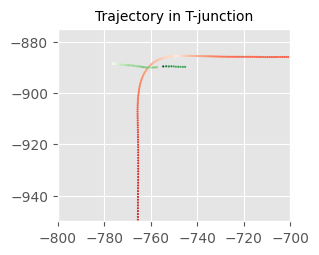

In [100]:
dataset = AVHV_val_conflict_dataset
for category in dataset.keys():
    for direction in dataset[category].keys():
        for index, conflict in enumerate(dataset[category][direction]):
            conflict = list(conflict.values())[0]
            conflict = Conflict(
                first_trajectory=conflict.first_agent_trajectory,
                second_trajectory=conflict.second_agent_trajectory,
                is_first_AV = True if conflict.first_agent_trajectory_id is None else False,
                is_second_AV = True if conflict.second_agent_trajectory_id is None else False,
                PET = conflict.delta_time,
                first_time_at_conflict = conflict.first_agent_conflict_time,
                second_time_at_conflict = conflict.second_agent_conflict_time,
                type=category,
            )
            conflict.plot(savefig_path=f"./scene_gif/val_{category}_{direction}_{index}")

### `Max required deceleration`

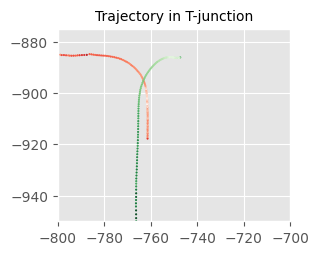

[8.82264461 3.32953408 4.65423435 0.0221163 ] [8.75255576741451, 7.870291306010222, 7.537337897942531, 7.071914463034289]
[8.82264461 3.32953408 4.65423435 0.0221163 ] [8.75255576741451, 7.870291306010222, 7.537337897942531, 7.071914463034289]
4.446647359591352 [4.44664736 0.70428125 1.43697269 0.00003458 1.09705469 0.56238564
 0.4480427  0.73655176 0.674362   0.51775714 0.68801807 0.34175427
 0.44869881 0.38784626 0.39275757 0.4217717  0.60521492 0.48569993
 0.49891454 0.44312811 0.74483516 0.4065918 ]


In [29]:
# for i in range(len(HVHV_val_conflict_dataset["cross"]["turnleft&turnleft"])):
conflict = HVHV_val_conflict_dataset["cross"]["turnleft&turnleft"][9]
conflict = list(conflict.values())[0]
conflict = Conflict(
    first_trajectory=conflict.first_agent_trajectory,
    second_trajectory=conflict.second_agent_trajectory,
    is_first_AV = True if conflict.first_agent_trajectory_id is None else False,
    is_second_AV = True if conflict.second_agent_trajectory_id is None else False,
    PET = conflict.delta_time,
    first_time_at_conflict = conflict.first_agent_conflict_time,
    second_time_at_conflict = conflict.second_agent_conflict_time,
    type="cross",
)
conflict.plot()
print(conflict.maximum_required_deceleration, conflict.required_decelerations)

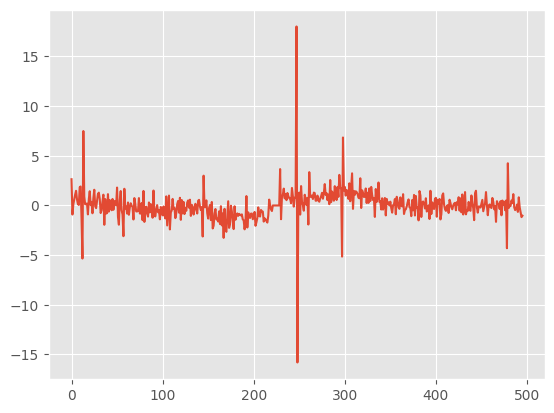

In [108]:
plt.plot(conflict.first_trajectory.a)

In [105]:
xy = conflict.first_trajectory.xy
v_x, v_y = np.diff(xy[:,0])/0.1, np.diff(xy[:,1]) / 0.1
v = np.sqrt(np.sum(np.square(np.stack((v_x, v_y), axis=1)), axis=1))
a_x, a_y = np.diff(v_x)/0.1, np.diff(v_y)/0.1
a = np.sqrt(np.sum(np.square(np.stack((a_x, a_y), axis=1)), axis=1))
max(conflict.first_trajectory.a), min(conflict.first_trajectory.a)

(18.017339586448518, -15.80318976536691)

[8.82264461 3.32953408 4.65423435 0.0221163 ] [8.75255576741451, 7.870291306010222, 7.537337897942531, 7.071914463034289]


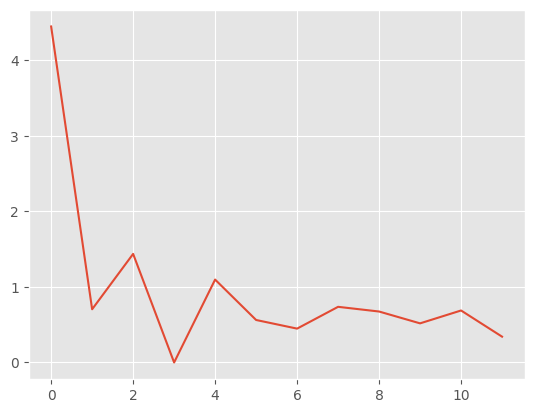

In [30]:
plt.plot(conflict.required_decelerations[:-10])

In [145]:
# for i in range(len(AVHV_val_conflict_dataset["merge"]['turnleft&turnright'])):

#     conflict = AVHV_val_conflict_dataset["merge"]["turnleft&turnright"][i]
#     conflict = list(conflict.values())[0]
#     conflict = Conflict(
#         first_trajectory=conflict.first_agent_trajectory,
#         second_trajectory=conflict.second_agent_trajectory,
#         is_first_AV = True if conflict.first_agent_trajectory_id is None else False,
#         is_second_AV = True if conflict.second_agent_trajectory_id is None else False,
#         PET = conflict.delta_time,
#         first_time_at_conflict = conflict.first_agent_conflict_time,
#         second_time_at_conflict = conflict.second_agent_conflict_time,
#         type="cross",
#     )
#     # conflict.plot()
#     print(conflict.is_first_AV, conflict.maximum_required_deceleration)

True 13.03224280970284
False 0.9555024967195354
False 0.9912873356308722
True 1.983063812317975
False 1.068272417876491
True 4.563054309475048
False 0.7597562783515095
False 1.0084627567980018
True 3.385924923994036
False 1.0217005887861348
False 0.940356721249993
False 5.601725049097742
False 2.9449937395236168
False 1.0079690715717082
True 2.7931429774303984
True 3.000887469515272
False 0.9912263791343876
False 1.06156302464878
True 3.208440377252743
True 3.5379009381763957


### `TTCs`

In [40]:
HVHV_TTCs = []
AVHV_TTCs = []
HVAV_TTCs = []

HVHV_TTCs_merge = []
AVHV_TTCs_merge = []
HVAV_TTCs_merge = []

HVHV_TTCs_cross = []
AVHV_TTCs_cross = []
HVAV_TTCs_cross = []

dataset = HVHV_val_conflict_dataset
for category in dataset.keys():
    for direction in dataset[category].keys():
        for index, conflict in enumerate(dataset[category][direction]):
            conflict = list(conflict.values())[0]
            conflict = Conflict(
                first_trajectory=conflict.first_agent_trajectory,
                second_trajectory=conflict.second_agent_trajectory,
                is_first_AV = True if conflict.first_agent_trajectory_id is None else False,
                is_second_AV = True if conflict.second_agent_trajectory_id is None else False,
                PET = conflict.delta_time,
                first_time_at_conflict = conflict.first_agent_conflict_time,
                second_time_at_conflict = conflict.second_agent_conflict_time,
                type=category,
            )
            HVHV_TTCs = HVHV_TTCs + conflict.TTCs
            if category == "merge":
                HVHV_TTCs_merge = HVHV_TTCs_merge + conflict.TTCs
            elif category == "cross":
                HVHV_TTCs_cross = HVHV_TTCs_cross + conflict.TTCs

dataset = HVHV_train_conflict_dataset
for category in dataset.keys():
    for direction in dataset[category].keys():
        for index, conflict in enumerate(dataset[category][direction]):
            conflict = list(conflict.values())[0]
            conflict = Conflict(
                first_trajectory=conflict.first_agent_trajectory,
                second_trajectory=conflict.second_agent_trajectory,
                is_first_AV = True if conflict.first_agent_trajectory_id is None else False,
                is_second_AV = True if conflict.second_agent_trajectory_id is None else False,
                PET = conflict.delta_time,
                first_time_at_conflict = conflict.first_agent_conflict_time,
                second_time_at_conflict = conflict.second_agent_conflict_time,
                type=category,
            )
            HVHV_TTCs = HVHV_TTCs + conflict.TTCs
            if category == "merge":
                HVHV_TTCs_merge = HVHV_TTCs_merge + conflict.TTCs
            elif category == "cross":
                HVHV_TTCs_cross = HVHV_TTCs_cross + conflict.TTCs
                
dataset = AVHV_val_conflict_dataset
for category in dataset.keys():
    for direction in dataset[category].keys():
        for index, conflict in enumerate(dataset[category][direction]):
            conflict = list(conflict.values())[0]
            conflict = Conflict(
                first_trajectory=conflict.first_agent_trajectory,
                second_trajectory=conflict.second_agent_trajectory,
                is_first_AV = True if conflict.first_agent_trajectory_id is None else False,
                is_second_AV = True if conflict.second_agent_trajectory_id is None else False,
                PET = conflict.delta_time,
                first_time_at_conflict = conflict.first_agent_conflict_time,
                second_time_at_conflict = conflict.second_agent_conflict_time,
                type=category,
            )
            if conflict.is_first_AV:
                AVHV_TTCs = AVHV_TTCs + conflict.TTCs
                if category == "merge":
                    AVHV_TTCs_merge = AVHV_TTCs_merge + conflict.TTCs
                elif category == "cross":
                    AVHV_TTCs_cross = AVHV_TTCs_cross + conflict.TTCs
            else:
                HVAV_TTCs = HVAV_TTCs + conflict.TTCs
                if category == "merge":
                    HVAV_TTCs_merge = HVAV_TTCs_merge + conflict.TTCs
                elif category == "cross":
                    HVAV_TTCs_cross = HVAV_TTCs_cross + conflict.TTCs

dataset = AVHV_train_conflict_dataset
for category in dataset.keys():
    for direction in dataset[category].keys():
        for index, conflict in enumerate(dataset[category][direction]):
            conflict = list(conflict.values())[0]
            conflict = Conflict(
                first_trajectory=conflict.first_agent_trajectory,
                second_trajectory=conflict.second_agent_trajectory,
                is_first_AV = True if conflict.first_agent_trajectory_id is None else False,
                is_second_AV = True if conflict.second_agent_trajectory_id is None else False,
                PET = conflict.delta_time,
                first_time_at_conflict = conflict.first_agent_conflict_time,
                second_time_at_conflict = conflict.second_agent_conflict_time,
                type=category,
            )
            if conflict.is_first_AV:
                AVHV_TTCs = AVHV_TTCs + conflict.TTCs
                if category == "merge":
                    AVHV_TTCs_merge = AVHV_TTCs_merge + conflict.TTCs
                elif category == "cross":
                    AVHV_TTCs_cross = AVHV_TTCs_cross + conflict.TTCs
            else:
                HVAV_TTCs = HVAV_TTCs + conflict.TTCs
                if category == "merge":
                    HVAV_TTCs_merge = HVAV_TTCs_merge + conflict.TTCs
                elif category == "cross":
                    HVAV_TTCs_cross = HVAV_TTCs_cross + conflict.TTCs



# HVHV_TTCs = pd.DataFrame({"TTC": HVHV_TTCs})
# AVHV_TTCs = pd.DataFrame({"TTC": AVHV_TTCs})
# HVAV_TTCs = pd.DataFrame({"TTC": HVAV_TTCs})

# HVHV_TTCs["class"] = 1
# AVHV_TTCs["class"] = 2
# HVAV_TTCs["class"] = 3

# TTCs = pd.concat([HVHV_TTCs, AVHV_TTCs, HVAV_TTCs])
# TTCs
# seaborn.histplot(data=TTCs, x="TTC", hue='class')
# plt.show()

C:\Users\LocalAdmin\AppData\Local\Temp\ipykernel_9976\1324417319.py:98: RuntimeWarning: divide by zero encountered in scalar divide
  length_trajectory / second_speeds_before_collision[i]


Mean: 11.071824135270425 Std: 6.304024590814708 Min: 0.5206053566207716 Median: 9.079207178447305
Mean: 9.378901393934061 Std: 5.404246424346522 Min: 1.4348100098960979 Median: 7.684989736780688
Mean: 12.885495126844885 Std: 6.42720866640099 Min: 4.550635104675331 Median: 10.943621044804985
Mean: 10.280467039247938 Std: 6.688960649393823 Min: 0.3022006479736369 Median: 8.141270295493857
Mean: 8.485293020307562 Std: 6.925738679655849 Min: 1.3828791643105063 Median: 5.393736457970276
Mean: 7.755556631772647 Std: 4.325930036720934 Min: 3.4610796936939017 Median: 6.250325028650302


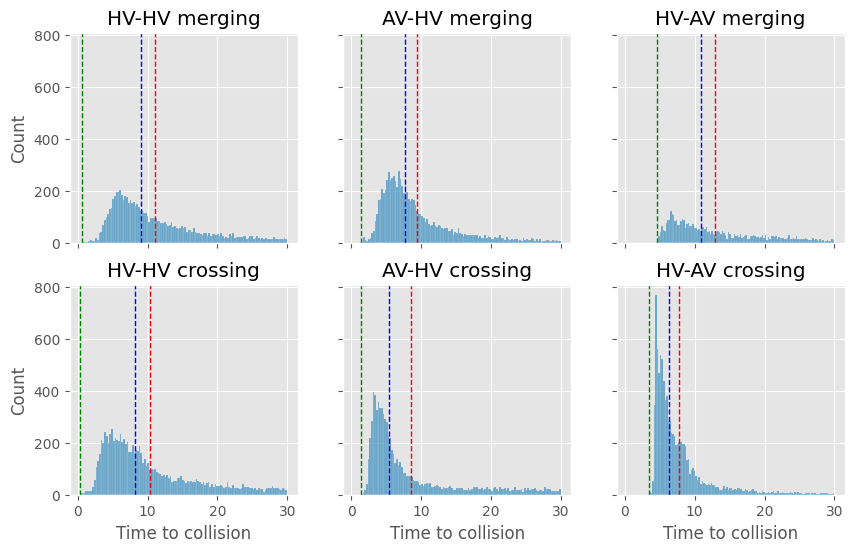

In [41]:
bins = 30

HVHV_TTCs = np.array(HVHV_TTCs)
HVHV_TTCs = HVHV_TTCs[HVHV_TTCs <= 30]
AVHV_TTCs = np.array(AVHV_TTCs)
AVHV_TTCs = AVHV_TTCs[AVHV_TTCs <= 30]
HVAV_TTCs = np.array(HVAV_TTCs)
HVAV_TTCs = HVAV_TTCs[HVAV_TTCs <= 30]

HVHV_TTCs_merge = np.array(HVHV_TTCs_merge)
HVHV_TTCs_merge = HVHV_TTCs_merge[HVHV_TTCs_merge <= 30]
AVHV_TTCs_merge = np.array(AVHV_TTCs_merge)
AVHV_TTCs_merge = AVHV_TTCs_merge[AVHV_TTCs_merge <= 30]
HVAV_TTCs_merge = np.array(HVAV_TTCs_merge)
HVAV_TTCs_merge = HVAV_TTCs_merge[HVAV_TTCs_merge <= 30]

HVHV_TTCs_cross = np.array(HVHV_TTCs_cross)
HVHV_TTCs_cross = HVHV_TTCs_cross[HVHV_TTCs_cross <= 30]
AVHV_TTCs_cross = np.array(AVHV_TTCs_cross)
AVHV_TTCs_cross = AVHV_TTCs_cross[AVHV_TTCs_cross <= 30]
HVAV_TTCs_cross = np.array(HVAV_TTCs_cross)
HVAV_TTCs_cross = HVAV_TTCs_cross[HVAV_TTCs_cross <= 30]

fig, axs = plt.subplots(2, 3, figsize=(10, 6), sharey=True, sharex=True)

# plt.figure(figsize=(4,4))
# plt.hist(x=HVHV_TTCs, bins=bins*4)
seaborn.histplot(x=HVHV_TTCs_merge, bins=bins*4, ax=axs[0,0])
mean = np.mean(HVHV_TTCs_merge)
minimum = np.min(HVHV_TTCs_merge)
median = np.median(HVHV_TTCs_merge)
std_dev = np.std(HVHV_TTCs_merge)
print("Mean:", mean, "Std:", std_dev, "Min:", minimum, "Median:", median)
axs[0,0].axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
axs[0,0].axvline(minimum, color='green', linestyle='dashed', linewidth=1, label='Min')
axs[0,0].axvline(median, color='blue', linestyle='dashed', linewidth=1, label='Median')
# axs[0,0].axvline(mean - std_dev, color='orange', linestyle='dashed', linewidth=1, label='Mean - Std Dev')
# axs[0,0].axvline(mean + std_dev, color='orange', linestyle='dashed', linewidth=1, label='Mean + Std Dev')
axs[0,0].set_title("HV-HV merging")
axs[0,0].set_xlabel("Time to collision")
axs[0,0].set_ylabel("Count")
# plt.show()

# plt.figure(figsize=(4,4))
# plt.hist(x=AVHV_TTCs, bins=bins*4)
seaborn.histplot(x=AVHV_TTCs_merge, bins=bins*4, ax=axs[0,1])
mean = np.mean(AVHV_TTCs_merge)
minimum = np.min(AVHV_TTCs_merge)
median = np.median(AVHV_TTCs_merge)
std_dev = np.std(AVHV_TTCs_merge)
print("Mean:", mean, "Std:", std_dev, "Min:", minimum, "Median:", median)
axs[0,1].axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
axs[0,1].axvline(minimum, color='green', linestyle='dashed', linewidth=1, label='Min')
axs[0,1].axvline(median, color='blue', linestyle='dashed', linewidth=1, label='Median')
# axs[0,1].axvline(mean - std_dev, color='orange', linestyle='dashed', linewidth=1, label='Mean - Std Dev')
# axs[0,1].axvline(mean + std_dev, color='orange', linestyle='dashed', linewidth=1, label='Mean + Std Dev')
axs[0,1].set_title("AV-HV merging")
axs[0,1].set_xlabel("Time to collision")
axs[0,1].set_ylabel("Count")
# plt.show()

# plt.figure(figsize=(4,4))
# plt.hist(x=HVAV_TTCs, bins=bins*4)
seaborn.histplot(x=HVAV_TTCs_merge, bins=bins*4, ax=axs[0,2])
mean = np.mean(HVAV_TTCs_merge)
minimum = np.min(HVAV_TTCs_merge)
median = np.median(HVAV_TTCs_merge)
std_dev = np.std(HVAV_TTCs_merge)
print("Mean:", mean, "Std:", std_dev, "Min:", minimum, "Median:", median)
axs[0,2].axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
axs[0,2].axvline(minimum, color='green', linestyle='dashed', linewidth=1, label='Min')
axs[0,2].axvline(median, color='blue', linestyle='dashed', linewidth=1, label='Median')
# axs[0,2].axvline(mean - std_dev, color='orange', linestyle='dashed', linewidth=1, label='Mean - Std Dev')
# axs[0,2].axvline(mean + std_dev, color='orange', linestyle='dashed', linewidth=1, label='Mean + Std Dev')
axs[0,2].set_title("HV-AV merging")
axs[0,2].set_xlabel("Time to collision")
axs[0,2].set_ylabel("Count")
# plt.show()

seaborn.histplot(x=HVHV_TTCs_cross, bins=bins*4, ax=axs[1,0])
mean = np.mean(HVHV_TTCs_cross)
minimum = np.min(HVHV_TTCs_cross)
median = np.median(HVHV_TTCs_cross)
std_dev = np.std(HVHV_TTCs_cross)
print("Mean:", mean, "Std:", std_dev, "Min:", minimum, "Median:", median)
axs[1,0].axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
axs[1,0].axvline(minimum, color='green', linestyle='dashed', linewidth=1, label='Min')
axs[1,0].axvline(median, color='blue', linestyle='dashed', linewidth=1, label='Median')
# axs[1,0].axvline(mean - std_dev, color='orange', linestyle='dashed', linewidth=1, label='Mean - Std Dev')
# axs[1,0].axvline(mean + std_dev, color='orange', linestyle='dashed', linewidth=1, label='Mean + Std Dev')
axs[1,0].set_title("HV-HV crossing")
axs[1,0].set_xlabel("Time to collision")
axs[1,0].set_ylabel("Count")
# plt.show()


# plt.figure(figsize=(4,4))
# plt.hist(x=AVHV_TTCs, bins=bins*4)
seaborn.histplot(x=AVHV_TTCs_cross, bins=bins*4, ax=axs[1,1])
mean = np.mean(AVHV_TTCs_cross)
minimum = np.min(AVHV_TTCs_cross)
median = np.median(AVHV_TTCs_cross)
std_dev = np.std(AVHV_TTCs_cross)
print("Mean:", mean, "Std:", std_dev, "Min:", minimum, "Median:", median)
axs[1,1].axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
axs[1,1].axvline(minimum, color='green', linestyle='dashed', linewidth=1, label='Min')
axs[1,1].axvline(median, color='blue', linestyle='dashed', linewidth=1, label='Median')
# axs[1,1].axvline(mean - std_dev, color='orange', linestyle='dashed', linewidth=1, label='Mean - Std Dev')
# axs[1,1].axvline(mean + std_dev, color='orange', linestyle='dashed', linewidth=1, label='Mean + Std Dev')
axs[1,1].set_title("AV-HV crossing")
axs[1,1].set_xlabel("Time to collision")
axs[1,1].set_ylabel("Count")
# plt.show()

# plt.figure(figsize=(4,4))
# plt.hist(x=HVAV_TTCs, bins=bins*4)
seaborn.histplot(x=HVAV_TTCs_cross, bins=bins*4, ax=axs[1,2])
mean = np.mean(HVAV_TTCs_cross)
minimum = np.min(HVAV_TTCs_cross)
median = np.median(HVAV_TTCs_cross)
std_dev = np.std(HVAV_TTCs_cross)
print("Mean:", mean, "Std:", std_dev, "Min:", minimum, "Median:", median)
axs[1,2].axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
axs[1,2].axvline(minimum, color='green', linestyle='dashed', linewidth=1, label='Min')
axs[1,2].axvline(median, color='blue', linestyle='dashed', linewidth=1, label='Median')
# axs[1,2].axvline(mean - std_dev, color='orange', linestyle='dashed', linewidth=1, label='Mean - Std Dev')
# axs[1,2].axvline(mean + std_dev, color='orange', linestyle='dashed', linewidth=1, label='Mean + Std Dev')
axs[1,2].set_title("HV-AV crossing")
axs[1,2].set_xlabel("Time to collision")
axs[1,2].set_ylabel("Count")
plt.show()

In [42]:
# conflict = HVHV_val_conflict_dataset["cross"]["straight&turnleftBottom"][2]
# conflict = list(conflict.values())[0]
# conflict = Conflict(
#     first_trajectory=conflict.first_agent_trajectory,
#     second_trajectory=conflict.second_agent_trajectory,
#     is_first_AV = True if conflict.first_agent_trajectory_id is None else False,
#     is_second_AV = True if conflict.second_agent_trajectory_id is None else False,
#     PET = conflict.delta_time,
#     first_time_at_conflict = conflict.first_agent_conflict_time,
#     second_time_at_conflict = conflict.second_agent_conflict_time,
#     type=category,
# )
# conflict.plot()
# conflict.TTCs

Mean: 10.625205294055098 Std: 6.535853078203438
Mean: 8.937015841089273 Std: 6.219503053389549
Mean: 9.343722047955872 Std: 5.597662883624371


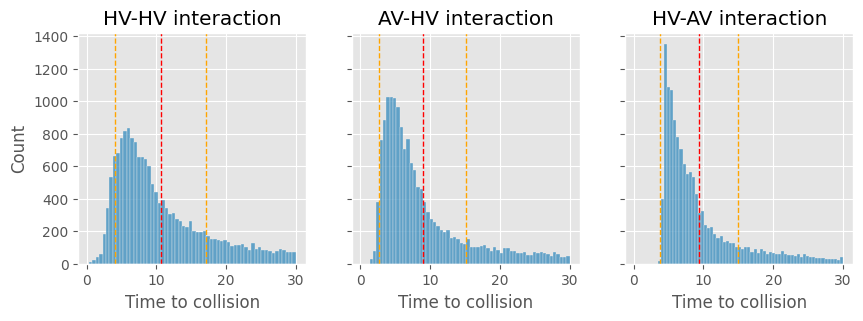

In [63]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3), sharey=True, sharex=True)

# plt.figure(figsize=(4,4))
# plt.hist(x=HVHV_TTCs, bins=bins*4)
# plt.hist(x=AVHV_TTCs, bins=bins*4)
# plt.hist(x=HVAV_TTCs, bins=bins*4)
seaborn.histplot(x=HVHV_TTCs, bins=bins*4, ax=axs[0])
mean = np.mean(HVHV_TTCs)
std_dev = np.std(HVHV_TTCs)
print("Mean:", mean, "Std:", std_dev)
axs[0].axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
axs[0].axvline(mean - std_dev, color='orange', linestyle='dashed', linewidth=1, label='Mean - Std Dev')
axs[0].axvline(mean + std_dev, color='orange', linestyle='dashed', linewidth=1, label='Mean + Std Dev')
axs[0].set_title("HV-HV interaction")
axs[0].set_xlabel("Time to collision")
axs[0].set_ylabel("Count")
# plt.show()


# plt.figure(figsize=(4,4))
# plt.hist(x=AVHV_TTCs, bins=bins*4)
seaborn.histplot(x=AVHV_TTCs, bins=bins*4, ax=axs[1])
mean = np.mean(AVHV_TTCs)
std_dev = np.std(AVHV_TTCs)
print("Mean:", mean, "Std:", std_dev)
axs[1].axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
axs[1].axvline(mean - std_dev, color='orange', linestyle='dashed', linewidth=1, label='Mean - Std Dev')
axs[1].axvline(mean + std_dev, color='orange', linestyle='dashed', linewidth=1, label='Mean + Std Dev')
axs[1].set_title("AV-HV interaction")
axs[1].set_xlabel("Time to collision")
axs[1].set_ylabel("Count")
# plt.show()

# plt.figure(figsize=(4,4))
# plt.hist(x=HVAV_TTCs, bins=bins*4)
seaborn.histplot(x=HVAV_TTCs, bins=bins*4, ax=axs[2])
mean = np.mean(HVAV_TTCs)
std_dev = np.std(HVAV_TTCs)
print("Mean:", mean, "Std:", std_dev)
axs[2].axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
axs[2].axvline(mean - std_dev, color='orange', linestyle='dashed', linewidth=1, label='Mean - Std Dev')
axs[2].axvline(mean + std_dev, color='orange', linestyle='dashed', linewidth=1, label='Mean + Std Dev')
axs[2].set_title("HV-AV interaction")
axs[2].set_xlabel("Time to collision")
axs[2].set_ylabel("Count")
plt.show()

In [44]:
# fig, axs = plt.subplots(1, 3, figsize=(10, 4), sharey=True, sharex=True)

# # plt.figure(figsize=(4,4))
# # plt.hist(x=HVHV_TTCs, bins=bins*4)
# # plt.hist(x=AVHV_TTCs, bins=bins*4)
# # plt.hist(x=HVAV_TTCs, bins=bins*4)
# seaborn.distplot(x=HVHV_TTCs, ax=axs[0])
# axs[0].set_title("HV-HV interaction")
# axs[0].set_xlabel("Time to collision")
# axs[0].set_ylabel("Count")
# # plt.show()


# # plt.figure(figsize=(4,4))
# # plt.hist(x=AVHV_TTCs, bins=bins*4)
# # seaborn.histplot(x=AVHV_TTCs, bins=bins*4, ax=axs[1])
# axs[1].set_title("AV-HV interaction")
# axs[1].set_xlabel("Time to collision")
# axs[1].set_ylabel("Count")
# # plt.show()

# # plt.figure(figsize=(4,4))
# # plt.hist(x=HVAV_TTCs, bins=bins*4)
# # seaborn.histplot(x=HVAV_TTCs, bins=bins*4, ax=axs[2])
# axs[2].set_title("HV-AV interaction")
# axs[2].set_xlabel("Time to collision")
# axs[2].set_ylabel("Count")
# plt.show()

### `Min TTC`

In [45]:
HVHV_minTTCs = []
AVHV_minTTCs = []
HVAV_minTTCs = []

HVHV_minTTCs_merge = []
AVHV_minTTCs_merge = []
HVAV_minTTCs_merge = []
HVHV_minTTCs_cross = []
AVHV_minTTCs_cross = []
HVAV_minTTCs_cross = []

dataset = HVHV_val_conflict_dataset
for category in dataset.keys():
    for direction in dataset[category].keys():
        for index, conflict in enumerate(dataset[category][direction]):
            conflict = list(conflict.values())[0]
            conflict = Conflict(
                first_trajectory=conflict.first_agent_trajectory,
                second_trajectory=conflict.second_agent_trajectory,
                is_first_AV = True if conflict.first_agent_trajectory_id is None else False,
                is_second_AV = True if conflict.second_agent_trajectory_id is None else False,
                PET = conflict.delta_time,
                first_time_at_conflict = conflict.first_agent_conflict_time,
                second_time_at_conflict = conflict.second_agent_conflict_time,
                type=category,
            )
            minTTC = conflict.minimum_TTC
            if minTTC != None:
                HVHV_minTTCs.append(minTTC)
                if category == "merge":
                    HVHV_minTTCs_merge.append(minTTC)
                else:
                    HVHV_minTTCs_cross.append(minTTC)

dataset = HVHV_train_conflict_dataset
for category in dataset.keys():
    for direction in dataset[category].keys():
        for index, conflict in enumerate(dataset[category][direction]):
            conflict = list(conflict.values())[0]
            conflict = Conflict(
                first_trajectory=conflict.first_agent_trajectory,
                second_trajectory=conflict.second_agent_trajectory,
                is_first_AV = True if conflict.first_agent_trajectory_id is None else False,
                is_second_AV = True if conflict.second_agent_trajectory_id is None else False,
                PET = conflict.delta_time,
                first_time_at_conflict = conflict.first_agent_conflict_time,
                second_time_at_conflict = conflict.second_agent_conflict_time,
                type=category,
            )
            minTTC = conflict.minimum_TTC
            if minTTC != None:
                HVHV_minTTCs.append(minTTC)
                if category == "merge":
                    HVHV_minTTCs_merge.append(minTTC)
                else:
                    HVHV_minTTCs_cross.append(minTTC)

dataset = AVHV_val_conflict_dataset
for category in dataset.keys():
    for direction in dataset[category].keys():
        for index, conflict in enumerate(dataset[category][direction]):
            conflict = list(conflict.values())[0]
            conflict = Conflict(
                first_trajectory=conflict.first_agent_trajectory,
                second_trajectory=conflict.second_agent_trajectory,
                is_first_AV = True if conflict.first_agent_trajectory_id is None else False,
                is_second_AV = True if conflict.second_agent_trajectory_id is None else False,
                PET = conflict.delta_time,
                first_time_at_conflict = conflict.first_agent_conflict_time,
                second_time_at_conflict = conflict.second_agent_conflict_time,
                type=category,
            )
            
            minTTC = conflict.minimum_TTC
            if conflict.is_first_AV:
                if minTTC != None:
                    AVHV_minTTCs.append(minTTC)
                    if category == "merge":
                        AVHV_minTTCs_merge.append(minTTC)
                    else:
                        AVHV_minTTCs_cross.append(minTTC)
            else:
                if minTTC != None:
                    HVAV_minTTCs.append(minTTC)
                    if category == "merge":
                        HVAV_minTTCs_merge.append(minTTC)
                    else:
                        HVAV_minTTCs_cross.append(minTTC)
                        
dataset = AVHV_train_conflict_dataset
for category in dataset.keys():
    for direction in dataset[category].keys():
        for index, conflict in enumerate(dataset[category][direction]):
            conflict = list(conflict.values())[0]
            conflict = Conflict(
                first_trajectory=conflict.first_agent_trajectory,
                second_trajectory=conflict.second_agent_trajectory,
                is_first_AV = True if conflict.first_agent_trajectory_id is None else False,
                is_second_AV = True if conflict.second_agent_trajectory_id is None else False,
                PET = conflict.delta_time,
                first_time_at_conflict = conflict.first_agent_conflict_time,
                second_time_at_conflict = conflict.second_agent_conflict_time,
                type=category,
            )
            
            minTTC = conflict.minimum_TTC
            if conflict.is_first_AV:
                if minTTC != None:
                    AVHV_minTTCs.append(minTTC)
                    if category == "merge":
                        AVHV_minTTCs_merge.append(minTTC)
                    else:
                        AVHV_minTTCs_cross.append(minTTC)
            else:
                if minTTC != None:
                    HVAV_minTTCs.append(minTTC)
                    if category == "merge":
                        HVAV_minTTCs_merge.append(minTTC)
                    else:
                        HVAV_minTTCs_cross.append(minTTC)

C:\Users\LocalAdmin\AppData\Local\Temp\ipykernel_9976\1324417319.py:98: RuntimeWarning: divide by zero encountered in scalar divide
  length_trajectory / second_speeds_before_collision[i]


Mean: 6.1505579989074395 Std: 3.1713507897958455 Min: 0.5206053566207716 Median: 5.540173667202816
Mean: 3.9779038131333633 Std: 1.8725979832769546 Min: 1.4348100098960979 Median: 3.683018049655579
Mean: 7.822566067338141 Std: 2.4669115230295136 Min: 4.550635104675331 Median: 7.364434783619231
Mean: 4.098169976925698 Std: 2.0103659122478725 Min: 0.3022006479736369 Median: 3.730564042942148
Mean: 3.4794087454510185 Std: 2.2410010399742366 Min: 1.3828791643105063 Median: 2.7634955567075137
Mean: 5.249959904962755 Std: 1.428229089227555 Min: 3.4610796936939017 Median: 4.96195886950274


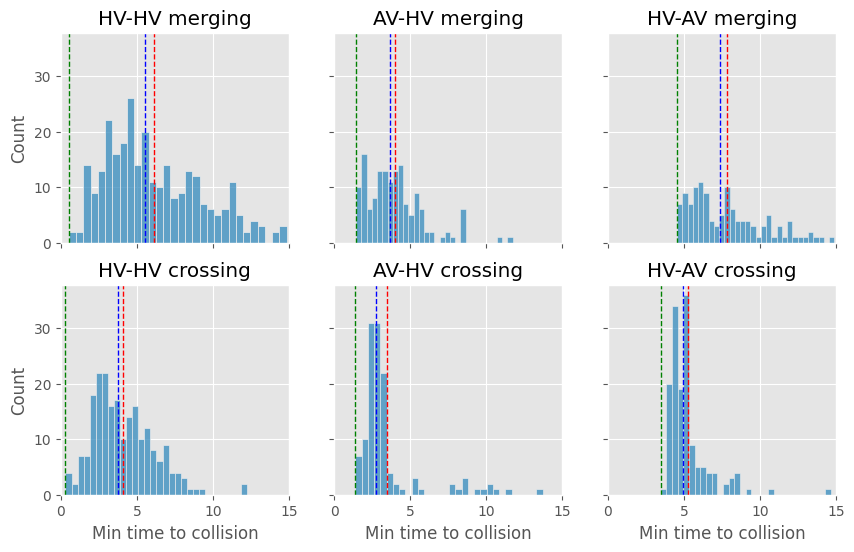

In [46]:
bins = 15
scale = 2
xlim_max = 15

fig, axs = plt.subplots(2, 3, figsize=(10, 6), sharey=True, sharex=True)

HVHV_minTTCs_merge = np.array(HVHV_minTTCs_merge)
HVHV_minTTCs_merge = HVHV_minTTCs_merge[HVHV_minTTCs_merge <= bins]
AVHV_minTTCs_merge = np.array(AVHV_minTTCs_merge)
AVHV_minTTCs_merge = AVHV_minTTCs_merge[AVHV_minTTCs_merge <= bins]
HVAV_minTTCs_merge = np.array(HVAV_minTTCs_merge)
HVAV_minTTCs_merge = HVAV_minTTCs_merge[HVAV_minTTCs_merge <= bins]

HVHV_minTTCs_cross = np.array(HVHV_minTTCs_cross)
HVHV_minTTCs_cross = HVHV_minTTCs_cross[HVHV_minTTCs_cross <= bins]
AVHV_minTTCs_cross = np.array(AVHV_minTTCs_cross)
AVHV_minTTCs_cross = AVHV_minTTCs_cross[AVHV_minTTCs_cross <= bins]
HVAV_minTTCs_cross = np.array(HVAV_minTTCs_cross)
HVAV_minTTCs_cross = HVAV_minTTCs_cross[HVAV_minTTCs_cross <= bins]

seaborn.histplot(x=HVHV_minTTCs_merge, bins=bins*scale, ax=axs[0,0])
mean = np.mean(HVHV_minTTCs_merge)
std_dev = np.std(HVHV_minTTCs_merge)
minimum = np.min(HVHV_minTTCs_merge)
median = np.median(HVHV_minTTCs_merge)
print("Mean:", mean, "Std:", std_dev, "Min:", minimum, "Median:", median)
axs[0,0].axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
axs[0,0].axvline(minimum, color='green', linestyle='dashed', linewidth=1, label='Min')
axs[0,0].axvline(median, color='blue', linestyle='dashed', linewidth=1, label='Median')
# axs[0].axvline(mean - std_dev, color='orange', linestyle='dashed', linewidth=1, label='Mean - Std Dev')
# axs[0].axvline(mean + std_dev, color='orange', linestyle='dashed', linewidth=1, label='Mean + Std Dev')
axs[0,0].set_title("HV-HV merging")
axs[0,0].set_xlabel("Min time to collision")
axs[0,0].set_xlim([0,xlim_max])
axs[0,0].set_ylabel("Count")
 
seaborn.histplot(x=AVHV_minTTCs_merge, bins=bins*scale, ax=axs[0,1])
mean = np.mean(AVHV_minTTCs_merge)
std_dev = np.std(AVHV_minTTCs_merge)
minimum = np.min(AVHV_minTTCs_merge)
median = np.median(AVHV_minTTCs_merge)
print("Mean:", mean, "Std:", std_dev, "Min:", minimum, "Median:", median)
axs[0,1].axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
axs[0,1].axvline(minimum, color='green', linestyle='dashed', linewidth=1, label='Min')
axs[0,1].axvline(median, color='blue', linestyle='dashed', linewidth=1, label='Median')
# axs[0].axvline(mean - std_dev, color='orange', linestyle='dashed', linewidth=1, label='Mean - Std Dev')
# axs[0].axvline(mean + std_dev, color='orange', linestyle='dashed', linewidth=1, label='Mean + Std Dev')
axs[0,1].set_title("AV-HV merging")
axs[0,1].set_xlabel("Min time to collision")
axs[0,1].set_xlim([0,xlim_max])
axs[0,1].set_ylabel("Count")
 
seaborn.histplot(x=HVAV_minTTCs_merge, bins=bins*scale, ax=axs[0,2])
mean = np.mean(HVAV_minTTCs_merge)
std_dev = np.std(HVAV_minTTCs_merge)
minimum = np.min(HVAV_minTTCs_merge)
median = np.median(HVAV_minTTCs_merge)
print("Mean:", mean, "Std:", std_dev, "Min:", minimum, "Median:", median)
axs[0,2].axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
axs[0,2].axvline(minimum, color='green', linestyle='dashed', linewidth=1, label='Min')
axs[0,2].axvline(median, color='blue', linestyle='dashed', linewidth=1, label='Median')
# axs[0].axvline(mean - std_dev, color='orange', linestyle='dashed', linewidth=1, label='Mean - Std Dev')
# axs[0].axvline(mean + std_dev, color='orange', linestyle='dashed', linewidth=1, label='Mean + Std Dev')
axs[0,2].set_title("HV-AV merging")
axs[0,2].set_xlabel("Min time to collision")
axs[0,2].set_xlim([0,xlim_max])
axs[0,2].set_ylabel("Count")

seaborn.histplot(x=HVHV_minTTCs_cross, bins=bins*scale, ax=axs[1,0])
mean = np.mean(HVHV_minTTCs_cross)
std_dev = np.std(HVHV_minTTCs_cross)
minimum = np.min(HVHV_minTTCs_cross)
median = np.median(HVHV_minTTCs_cross)
print("Mean:", mean, "Std:", std_dev, "Min:", minimum, "Median:", median)
axs[1,0].axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
axs[1,0].axvline(minimum, color='green', linestyle='dashed', linewidth=1, label='Min')
axs[1,0].axvline(median, color='blue', linestyle='dashed', linewidth=1, label='Median')
# axs[0].axvline(mean - std_dev, color='orange', linestyle='dashed', linewidth=1, label='Mean - Std Dev')
# axs[0].axvline(mean + std_dev, color='orange', linestyle='dashed', linewidth=1, label='Mean + Std Dev')
axs[1,0].set_title("HV-HV crossing")
axs[1,0].set_xlabel("Min time to collision")
axs[1,0].set_xlim([0,xlim_max])
axs[1,0].set_ylabel("Count")
 
seaborn.histplot(x=AVHV_minTTCs_cross, bins=bins*scale, ax=axs[1,1])
mean = np.mean(AVHV_minTTCs_cross)
std_dev = np.std(AVHV_minTTCs_cross)
minimum = np.min(AVHV_minTTCs_cross)
median = np.median(AVHV_minTTCs_cross)
print("Mean:", mean, "Std:", std_dev, "Min:", minimum, "Median:", median)
axs[1,1].axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
axs[1,1].axvline(minimum, color='green', linestyle='dashed', linewidth=1, label='Min')
axs[1,1].axvline(median, color='blue', linestyle='dashed', linewidth=1, label='Median')
# axs[0].axvline(mean - std_dev, color='orange', linestyle='dashed', linewidth=1, label='Mean - Std Dev')
# axs[0].axvline(mean + std_dev, color='orange', linestyle='dashed', linewidth=1, label='Mean + Std Dev')
axs[1,1].set_title("AV-HV crossing")
axs[1,1].set_xlabel("Min time to collision")
axs[1,1].set_xlim([0,xlim_max])
axs[1,1].set_ylabel("Count")
 
seaborn.histplot(x=HVAV_minTTCs_cross, bins=bins*scale, ax=axs[1,2])
mean = np.mean(HVAV_minTTCs_cross)
std_dev = np.std(HVAV_minTTCs_cross)
minimum = np.min(HVAV_minTTCs_cross)
median = np.median(HVAV_minTTCs_cross)
print("Mean:", mean, "Std:", std_dev, "Min:", minimum, "Median:", median)
axs[1,2].axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
axs[1,2].axvline(minimum, color='green', linestyle='dashed', linewidth=1, label='Min')
axs[1,2].axvline(median, color='blue', linestyle='dashed', linewidth=1, label='Median')
# axs[0].axvline(mean - std_dev, color='orange', linestyle='dashed', linewidth=1, label='Mean - Std Dev')
# axs[0].axvline(mean + std_dev, color='orange', linestyle='dashed', linewidth=1, label='Mean + Std Dev')
axs[1,2].set_title("HV-AV crossing")
axs[1,2].set_xlabel("Min time to collision")
axs[1,2].set_xlim([0,xlim_max])
axs[1,2].set_ylabel("Count")

plt.show()

Mean: 5.2692144347959955 Std: 2.91653767375213 Min: 0.3022006479736369 Median: 4.622639276097225
Mean: 3.7488160062940503 Std: 2.0651356536697105 Min: 1.3828791643105063 Median: 3.0912515670310645
Mean: 6.408107328615143 Std: 2.3450699125218475 Min: 3.4610796936939017 Median: 5.54864536593269


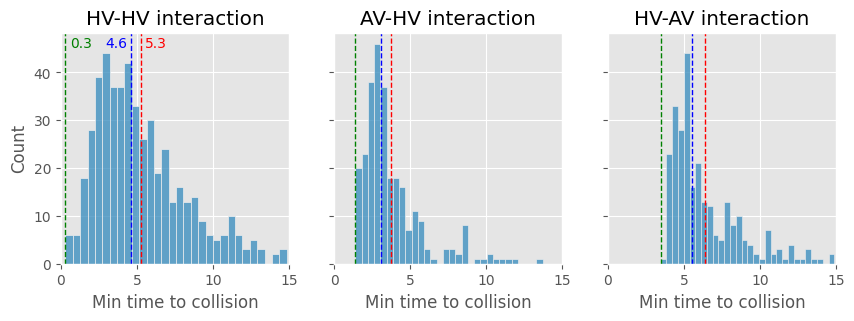

In [64]:
bins = 15
scale = 2
xlim_max = 15

fig, axs = plt.subplots(1, 3, figsize=(10, 3), sharey=True, sharex=True)

HVHV_minTTCs = np.array(HVHV_minTTCs)
HVHV_minTTCs = HVHV_minTTCs[HVHV_minTTCs <= bins]
AVHV_minTTCs = np.array(AVHV_minTTCs)
AVHV_minTTCs = AVHV_minTTCs[AVHV_minTTCs <= bins]
HVAV_minTTCs = np.array(HVAV_minTTCs)
HVAV_minTTCs = HVAV_minTTCs[HVAV_minTTCs <= bins]

# plt.figure(figsize=(4,4))
seaborn.histplot(x=HVHV_minTTCs, bins=bins*scale, ax=axs[0])
mean = np.mean(HVHV_minTTCs)
std_dev = np.std(HVHV_minTTCs)
minimum = np.min(HVHV_minTTCs)
median = np.median(HVHV_minTTCs)
print("Mean:", mean, "Std:", std_dev, "Min:", minimum, "Median:", median)
axs[0].axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
axs[0].annotate(f'{mean:.1f}', xy=(mean, 45.25), xytext=(mean + 1, 45.3), color="red", fontsize=10, ha='center')
axs[0].axvline(minimum, color='green', linestyle='dashed', linewidth=1, label='Min')
axs[0].annotate(f'{minimum:.1f}', xy=(minimum, 45.25), xytext=(minimum + 1, 45.3), color="green", fontsize=10, ha='center')
axs[0].axvline(median, color='blue', linestyle='dashed', linewidth=1, label='Median')
axs[0].annotate(f'{median:.1f}', xy=(median, 45.25), xytext=(median - 1, 45.3), color="blue", fontsize=10, ha='center')
# axs[0].axvline(mean - std_dev, color='orange', linestyle='dashed', linewidth=1, label='Mean - Std Dev')
# axs[0].axvline(mean + std_dev, color='orange', linestyle='dashed', linewidth=1, label='Mean + Std Dev')
axs[0].set_title("HV-HV interaction")
axs[0].set_xlabel("Min time to collision")
axs[0].set_xlim([0,xlim_max])
axs[0].set_ylabel("Count")
# plt.show()

# plt.figure(figsize=(4,4))
seaborn.histplot(x=AVHV_minTTCs, bins=bins*scale, ax=axs[1])
mean = np.mean(AVHV_minTTCs)
std_dev = np.std(AVHV_minTTCs)
minimum = np.min(AVHV_minTTCs)
median = np.median(AVHV_minTTCs)
print("Mean:", mean, "Std:", std_dev, "Min:", minimum, "Median:", median)
axs[1].axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
axs[1].axvline(minimum, color='green', linestyle='dashed', linewidth=1, label='Min')
axs[1].axvline(median, color='blue', linestyle='dashed', linewidth=1, label='Median')
axs[1].set_title("AV-HV interaction")
axs[1].set_xlabel("Min time to collision")
axs[1].set_xlim([0,xlim_max])
axs[1].set_ylabel("Count")
# plt.show()

# plt.figure(figsize=(4,4))
seaborn.histplot(x=HVAV_minTTCs, bins=bins*scale, ax=axs[2])
mean = np.mean(HVAV_minTTCs)
std_dev = np.std(HVAV_minTTCs)
minimum = np.min(HVAV_minTTCs)
median = np.median(HVAV_minTTCs)
print("Mean:", mean, "Std:", std_dev, "Min:", minimum, "Median:", median)
axs[2].axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
axs[2].axvline(minimum, color='green', linestyle='dashed', linewidth=1, label='Min')
axs[2].axvline(median, color='blue', linestyle='dashed', linewidth=1, label='Median')
axs[2].set_title("HV-AV interaction")
axs[2].set_xlabel("Min time to collision")
axs[2].set_xlim([0,xlim_max])
axs[2].set_ylabel("Count")
plt.show()

## `PET`

In [48]:
def get_postEcroachmentTime_from_HVHVdataset(dataset) -> dict:
    HVHV_PET = {
        "merge": {
            "straight&turnleft": [],
            "straight&turnright": [],
            "turnleft&turnright": [],
        },
        "cross": {
            "straight&turnleftBottom": [],
            "straight&turnleftRight": [],
            "turnleft&turnleft": [],
        },
        "all": []
    }

    for category in dataset.keys():
        for directions in dataset[category].keys():
            for element in dataset[category][directions]:
                pet = list(element.values())[0].delta_time/10
                HVHV_PET[category][directions].append(pet)
                HVHV_PET["all"].append(pet)

    return HVHV_PET

def get_postEcroachmentTime_from_AVHVdataset(dataset):
    AVHV_PET = {
        "merge": {
            "straight&turnright": [],
            "turnleft&turnright": [],
        },
        "cross": {
            "straight&turnleft": [],
            "turnleft&turnleft": [],
        },
        "all": []
    }
    HVAV_PET = {
        "merge": {
            "straight&turnright": [],
            "turnleft&turnright": [],
        },
        "cross": {
            "straight&turnleft": [],
            "turnleft&turnleft": [],
        },
        "all": []
    }

    for category in dataset.keys():
        for directions in dataset[category].keys():
            for element in dataset[category][directions]:
                conflict = list(element.values())[0]
                pet = conflict.delta_time/10
                # AV-HV conflict;
                if conflict.first_agent_trajectory_id is None:
                    AVHV_PET[category][directions].append(pet)
                    AVHV_PET["all"].append(pet)
                # HV-AV conflict;
                else:
                    HVAV_PET[category][directions].append(pet)
                    HVAV_PET["all"].append(pet)
                    
    return AVHV_PET, HVAV_PET

HVHV_val_PET = np.array(get_postEcroachmentTime_from_HVHVdataset(HVHV_val_conflict_dataset)["all"])
AVHV_val_PET, HVAV_val_PET = get_postEcroachmentTime_from_AVHVdataset(AVHV_val_conflict_dataset)
AVHV_val_PET, HVAV_val_PET = np.array(AVHV_val_PET["all"]), np.array(HVAV_val_PET["all"])

HVHV_train_PET = np.array(get_postEcroachmentTime_from_HVHVdataset(HVHV_train_conflict_dataset)["all"])
AVHV_train_PET, HVAV_train_PET = get_postEcroachmentTime_from_AVHVdataset(AVHV_train_conflict_dataset)
AVHV_train_PET, HVAV_train_PET = np.array(AVHV_train_PET["all"]), np.array(HVAV_train_PET["all"])

HVHV_PET = np.concatenate([HVHV_train_PET, HVHV_val_PET])
AVHV_PET = np.concatenate([AVHV_train_PET, AVHV_val_PET])
HVAV_PET = np.concatenate([HVAV_train_PET, HVAV_val_PET])
assert HVHV_PET.shape[0] == HVHV_train_PET.shape[0] + HVHV_val_PET.shape[0]
assert AVHV_PET.shape[0] == AVHV_train_PET.shape[0] + AVHV_val_PET.shape[0]
assert HVAV_PET.shape[0] == HVAV_train_PET.shape[0] + HVAV_val_PET.shape[0]

### `Visualization`

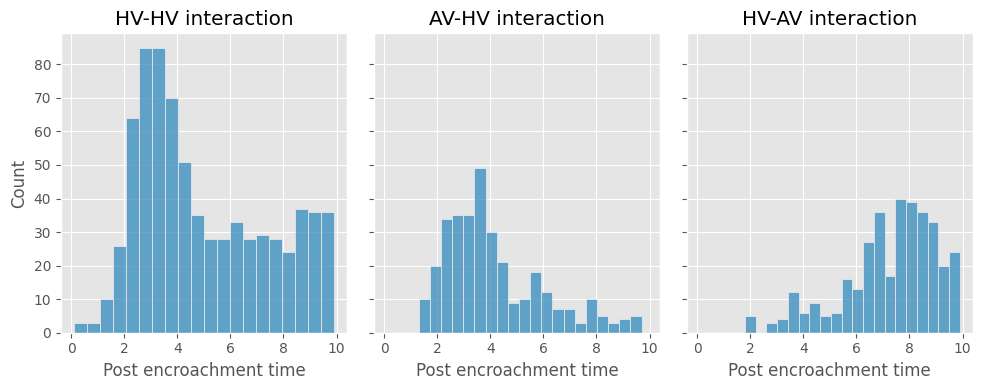

In [49]:
fig, axs = plt.subplots(1, 3, figsize=(10, 4), sharey=True, sharex=True)

seaborn.histplot(data=HVHV_PET, bins=20, ax=axs[0])
seaborn.histplot(data=AVHV_PET, bins=20, ax=axs[1])
seaborn.histplot(data=HVAV_PET, bins=20, ax=axs[2])

axs[0].set_title("HV-HV interaction")
axs[0].set_xlabel("Post encroachment time")
axs[0].set_ylabel("Count")

axs[1].set_title("AV-HV interaction")
axs[1].set_xlabel("Post encroachment time")
axs[1].set_ylabel("Count")

axs[2].set_title("HV-AV interaction")
axs[2].set_xlabel("Post encroachment time")
axs[2].set_ylabel("Count")

plt.tight_layout()
plt.show()

In [50]:
def get_PET_DataFrame(data):
    PET = []
    category = []
    direction = []
    type = []
    for category_index in data.keys():
        for direction_index in data[category_index].keys():
            pets = data[category_index][direction_index]
            for idx, pet in enumerate(pets):
                PET.append(pet)
                category.append(category_index)
                direction.append(direction_index)
                type.append(category_index+"_"+direction_index)

    return pd.DataFrame({
        "PET": PET,
        "Category": category,
        "Direction": direction,
        "Type": type
    })

HVHV_val_PET = get_postEcroachmentTime_from_HVHVdataset(HVHV_val_conflict_dataset)
HVHV_val_PET.pop("all")
HVHV_val_PET = get_PET_DataFrame(HVHV_val_PET)

AVHV_val_PET, HVAV_val_PET = get_postEcroachmentTime_from_AVHVdataset(AVHV_val_conflict_dataset)
AVHV_val_PET.pop("all")
HVAV_val_PET.pop("all")
AVHV_val_PET = get_PET_DataFrame(AVHV_val_PET)
HVAV_val_PET = get_PET_DataFrame(HVAV_val_PET)

HVHV_train_PET = get_postEcroachmentTime_from_HVHVdataset(HVHV_train_conflict_dataset)
HVHV_train_PET.pop("all")
HVHV_train_PET = get_PET_DataFrame(HVHV_train_PET)

AVHV_train_PET, HVAV_train_PET = get_postEcroachmentTime_from_AVHVdataset(AVHV_train_conflict_dataset)
AVHV_train_PET.pop("all")
HVAV_train_PET.pop("all")
AVHV_train_PET = get_PET_DataFrame(AVHV_train_PET)
HVAV_train_PET = get_PET_DataFrame(HVAV_train_PET)

# concatenate
HVHV_PET = pd.concat([HVHV_val_PET, HVHV_train_PET])
AVHV_PET = pd.concat([AVHV_val_PET, AVHV_train_PET])
HVAV_PET = pd.concat([HVAV_val_PET, HVAV_train_PET])

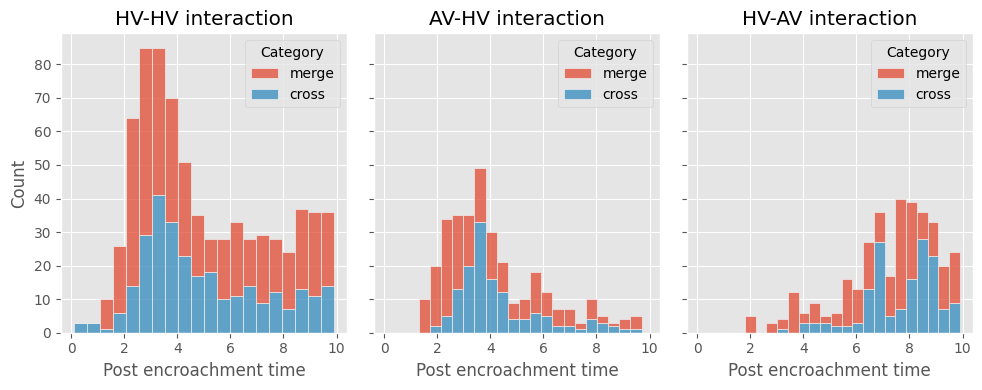

In [51]:
multiple = "stack"

fig, axs = plt.subplots(1, 3, figsize=(10, 4), sharey=True, sharex=True)

seaborn.histplot(data=HVHV_PET, x="PET", hue="Category", bins=20, ax=axs[0], multiple=multiple)
seaborn.histplot(data=AVHV_PET, x="PET", hue="Category", bins=20, ax=axs[1], multiple=multiple)
seaborn.histplot(data=HVAV_PET, x="PET", hue="Category", bins=20, ax=axs[2], multiple=multiple)

axs[0].set_title("HV-HV interaction")
axs[0].set_xlabel("Post encroachment time")
axs[0].set_ylabel("Count")

axs[1].set_title("AV-HV interaction")
axs[1].set_xlabel("Post encroachment time")
axs[1].set_ylabel("Count")

axs[2].set_title("HV-AV interaction")
axs[2].set_xlabel("Post encroachment time")
axs[2].set_ylabel("Count")

plt.tight_layout()
plt.show()

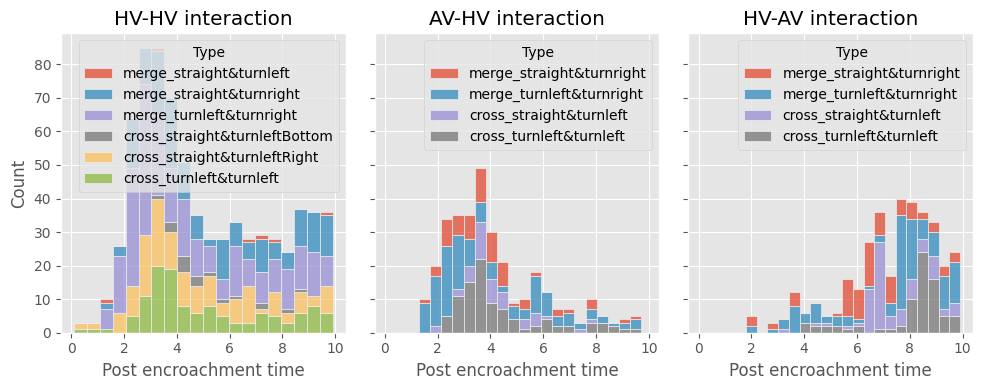

In [52]:
multiple = "stack"

fig, axs = plt.subplots(1, 3, figsize=(10, 4), sharey=True, sharex=True)

seaborn.histplot(data=HVHV_PET, x="PET", hue="Type", bins=20, ax=axs[0], multiple=multiple)
seaborn.histplot(data=AVHV_PET, x="PET", hue="Type", bins=20, ax=axs[1], multiple=multiple)
seaborn.histplot(data=HVAV_PET, x="PET", hue="Type", bins=20, ax=axs[2], multiple=multiple)

axs[0].set_title("HV-HV interaction")
axs[0].set_xlabel("Post encroachment time")
axs[0].set_ylabel("Count")

axs[1].set_title("AV-HV interaction")
axs[1].set_xlabel("Post encroachment time")
axs[1].set_ylabel("Count")

axs[2].set_title("HV-AV interaction")
axs[2].set_xlabel("Post encroachment time")
axs[2].set_ylabel("Count")

plt.tight_layout()
plt.show()

## `Speed`

### `Average speed`

In [167]:
#******* HV-HV ******#
HVHV_average_speeds_first = []
HVHV_average_speeds_second = []
HVHV_PETs = []
HVHV_MRDs = []

HVHV_average_speeds_first_merge = []
HVHV_average_speeds_second_merge = []
HVHV_PETs_merge = []
HVHV_MRDs_merge = []

HVHV_average_speeds_first_cross = []
HVHV_average_speeds_second_cross = []
HVHV_PETs_cross = []
HVHV_MRDs_cross = []

dataset = HVHV_val_conflict_dataset
for category in dataset.keys():
    for direction in dataset[category].keys():
        for index, conflict in enumerate(dataset[category][direction]):
            conflict = list(conflict.values())[0]
            conflict = Conflict(
                first_trajectory=conflict.first_agent_trajectory,
                second_trajectory=conflict.second_agent_trajectory,
                is_first_AV = True if conflict.first_agent_trajectory_id is None else False,
                is_second_AV = True if conflict.second_agent_trajectory_id is None else False,
                PET = conflict.delta_time,
                first_time_at_conflict = conflict.first_agent_conflict_time,
                second_time_at_conflict = conflict.second_agent_conflict_time,
                type=category,
            )
            maximum_required_deceleration = conflict.maximum_required_deceleration
            if maximum_required_deceleration < 5:
                HVHV_MRDs.append(conflict.maximum_required_deceleration)
            HVHV_average_speeds_first.append(conflict.first_veh_average_speed)
            HVHV_average_speeds_second.append(conflict.second_veh_average_speed)
            HVHV_PETs.append(conflict.PET)
            # HVHV_MRDs.append(conflict.maximum_required_deceleration)
            if category == "merge":
                HVHV_average_speeds_first_merge.append(conflict.first_veh_average_speed)
                HVHV_average_speeds_second_merge.append(conflict.second_veh_average_speed)
                HVHV_PETs_merge.append(conflict.PET)
                HVHV_MRDs_merge.append(conflict.maximum_required_deceleration)
            elif category == "cross":
                HVHV_average_speeds_first_cross.append(conflict.first_veh_average_speed)
                HVHV_average_speeds_second_cross.append(conflict.second_veh_average_speed)
                HVHV_PETs_cross.append(conflict.PET)
                HVHV_MRDs_cross.append(conflict.maximum_required_deceleration)

dataset = HVHV_train_conflict_dataset
for category in dataset.keys():
    for direction in dataset[category].keys():
        for index, conflict in enumerate(dataset[category][direction]):
            conflict = list(conflict.values())[0]
            conflict = Conflict(
                first_trajectory=conflict.first_agent_trajectory,
                second_trajectory=conflict.second_agent_trajectory,
                is_first_AV = True if conflict.first_agent_trajectory_id is None else False,
                is_second_AV = True if conflict.second_agent_trajectory_id is None else False,
                PET = conflict.delta_time,
                first_time_at_conflict = conflict.first_agent_conflict_time,
                second_time_at_conflict = conflict.second_agent_conflict_time,
                type=category,
            )
            maximum_required_deceleration = conflict.maximum_required_deceleration
            if maximum_required_deceleration < 5:
                HVHV_MRDs.append(conflict.maximum_required_deceleration)
            HVHV_average_speeds_first.append(conflict.first_veh_average_speed)
            HVHV_average_speeds_second.append(conflict.second_veh_average_speed)
            HVHV_PETs.append(conflict.PET)
            # HVHV_MRDs.append(conflict.maximum_required_deceleration)
            if category == "merge":
                HVHV_average_speeds_first_merge.append(conflict.first_veh_average_speed)
                HVHV_average_speeds_second_merge.append(conflict.second_veh_average_speed)
                HVHV_PETs_merge.append(conflict.PET)
                HVHV_MRDs_merge.append(conflict.maximum_required_deceleration)
            elif category == "cross":
                HVHV_average_speeds_first_cross.append(conflict.first_veh_average_speed)
                HVHV_average_speeds_second_cross.append(conflict.second_veh_average_speed)
                HVHV_PETs_cross.append(conflict.PET)
                HVHV_MRDs_cross.append(conflict.maximum_required_deceleration)

# #******* AV-HV & HV-AV ******#
# all
AVHV_average_speeds_first = []
AVHV_average_speeds_second = []
AVHV_PETs = []
AVHV_MRDs = []
HVAV_average_speeds_first = []
HVAV_average_speeds_second = []
HVAV_PETs = []
HVAV_MRDs = []

# merge
AVHV_average_speeds_first_merge = []
AVHV_average_speeds_second_merge = []
AVHV_PETs_merge = []
AVHV_MRDs_merge = []
HVAV_average_speeds_first_merge = []
HVAV_average_speeds_second_merge = []
HVAV_PETs_merge = []
HVAV_MRDs_merge = []

# cross
AVHV_average_speeds_first_cross = []
AVHV_average_speeds_second_cross = []
AVHV_PETs_cross = []
AVHV_MRDs_cross = []
HVAV_average_speeds_first_cross = []
HVAV_average_speeds_second_cross = []
HVAV_PETs_cross = []
HVAV_MRDs_cross = []

dataset = AVHV_val_conflict_dataset
for category in dataset.keys():
    for direction in dataset[category].keys():
        for index, conflict in enumerate(dataset[category][direction]):
            conflict = list(conflict.values())[0]
            conflict = Conflict(
                first_trajectory=conflict.first_agent_trajectory,
                second_trajectory=conflict.second_agent_trajectory,
                is_first_AV = True if conflict.first_agent_trajectory_id is None else False,
                is_second_AV = True if conflict.second_agent_trajectory_id is None else False,
                PET = conflict.delta_time,
                first_time_at_conflict = conflict.first_agent_conflict_time,
                second_time_at_conflict = conflict.second_agent_conflict_time,
                type=category,
            )
            if conflict.is_first_AV:
                maximum_required_deceleration = conflict.maximum_required_deceleration
                if maximum_required_deceleration < 5:
                    AVHV_MRDs.append(conflict.maximum_required_deceleration)
                AVHV_average_speeds_first.append(conflict.first_veh_average_speed)
                AVHV_average_speeds_second.append(conflict.second_veh_average_speed)
                AVHV_PETs.append(conflict.PET)
                # AVHV_MRDs.append(conflict.maximum_required_deceleration)
                if category == "merge":
                    AVHV_average_speeds_first_merge.append(conflict.first_veh_average_speed)
                    AVHV_average_speeds_second_merge.append(conflict.second_veh_average_speed)
                    AVHV_PETs_merge.append(conflict.PET)
                    AVHV_MRDs_merge.append(conflict.maximum_required_deceleration)
                elif category == "cross":
                    AVHV_average_speeds_first_cross.append(conflict.first_veh_average_speed)
                    AVHV_average_speeds_second_cross.append(conflict.second_veh_average_speed)
                    AVHV_PETs_cross.append(conflict.PET)
                    AVHV_MRDs_cross.append(conflict.maximum_required_deceleration)
            else:
                maximum_required_deceleration = conflict.maximum_required_deceleration
                if maximum_required_deceleration < 5:
                    HVAV_MRDs.append(maximum_required_deceleration)
                HVAV_average_speeds_first.append(conflict.first_veh_average_speed)
                HVAV_average_speeds_second.append(conflict.second_veh_average_speed)
                HVAV_PETs.append(conflict.PET)

                if category == "merge":
                    HVAV_average_speeds_first_merge.append(conflict.first_veh_average_speed)
                    HVAV_average_speeds_second_merge.append(conflict.second_veh_average_speed)
                    HVAV_PETs_merge.append(conflict.PET)
                    HVAV_MRDs_merge.append(conflict.maximum_required_deceleration)
                elif category == "cross":
                    HVAV_average_speeds_first_cross.append(conflict.first_veh_average_speed)
                    HVAV_average_speeds_second_cross.append(conflict.second_veh_average_speed)
                    HVAV_PETs_cross.append(conflict.PET)
                    HVAV_MRDs_cross.append(conflict.maximum_required_deceleration)

dataset = AVHV_train_conflict_dataset
for category in dataset.keys():
    for direction in dataset[category].keys():
        for index, conflict in enumerate(dataset[category][direction]):
            conflict = list(conflict.values())[0]
            conflict = Conflict(
                first_trajectory=conflict.first_agent_trajectory,
                second_trajectory=conflict.second_agent_trajectory,
                is_first_AV = True if conflict.first_agent_trajectory_id is None else False,
                is_second_AV = True if conflict.second_agent_trajectory_id is None else False,
                PET = conflict.delta_time,
                first_time_at_conflict = conflict.first_agent_conflict_time,
                second_time_at_conflict = conflict.second_agent_conflict_time,
                type=category,
            )
            if conflict.is_first_AV:
                maximum_required_deceleration = conflict.maximum_required_deceleration
                if maximum_required_deceleration < 5:
                    AVHV_MRDs.append(conflict.maximum_required_deceleration)
                AVHV_average_speeds_first.append(conflict.first_veh_average_speed)
                AVHV_average_speeds_second.append(conflict.second_veh_average_speed)
                AVHV_PETs.append(conflict.PET)
                # AVHV_MRDs.append(conflict.maximum_required_deceleration)
                if category == "merge":
                    AVHV_average_speeds_first_merge.append(conflict.first_veh_average_speed)
                    AVHV_average_speeds_second_merge.append(conflict.second_veh_average_speed)
                    AVHV_PETs_merge.append(conflict.PET)
                    AVHV_MRDs_merge.append(conflict.maximum_required_deceleration)
                elif category == "cross":
                    AVHV_average_speeds_first_cross.append(conflict.first_veh_average_speed)
                    AVHV_average_speeds_second_cross.append(conflict.second_veh_average_speed)
                    AVHV_PETs_cross.append(conflict.PET)
                    AVHV_MRDs_cross.append(conflict.maximum_required_deceleration)
            else:
                maximum_required_deceleration = conflict.maximum_required_deceleration
                if maximum_required_deceleration < 5:
                    HVAV_MRDs.append(maximum_required_deceleration)
                HVAV_average_speeds_first.append(conflict.first_veh_average_speed)
                HVAV_average_speeds_second.append(conflict.second_veh_average_speed)
                HVAV_PETs.append(conflict.PET)

                if category == "merge":
                    HVAV_average_speeds_first_merge.append(conflict.first_veh_average_speed)
                    HVAV_average_speeds_second_merge.append(conflict.second_veh_average_speed)
                    HVAV_PETs_merge.append(conflict.PET)
                    HVAV_MRDs_merge.append(conflict.maximum_required_deceleration)
                elif category == "cross":
                    HVAV_average_speeds_first_cross.append(conflict.first_veh_average_speed)
                    HVAV_average_speeds_second_cross.append(conflict.second_veh_average_speed)
                    HVAV_PETs_cross.append(conflict.PET)
                    HVAV_MRDs_cross.append(conflict.maximum_required_deceleration)

#### `visualization`

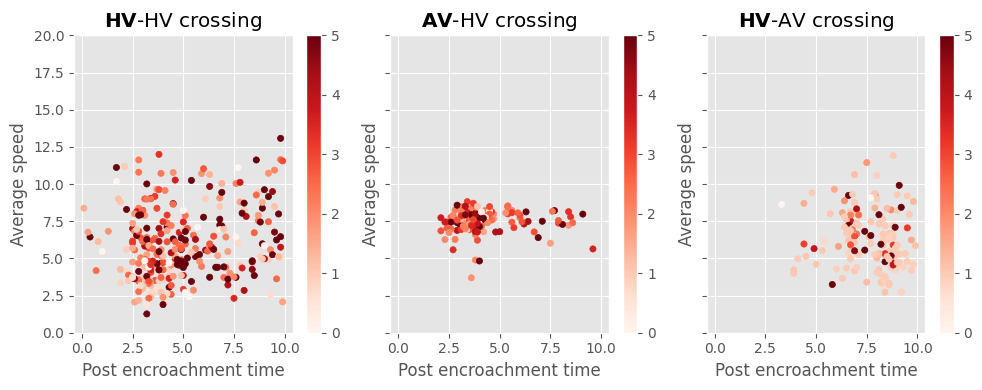

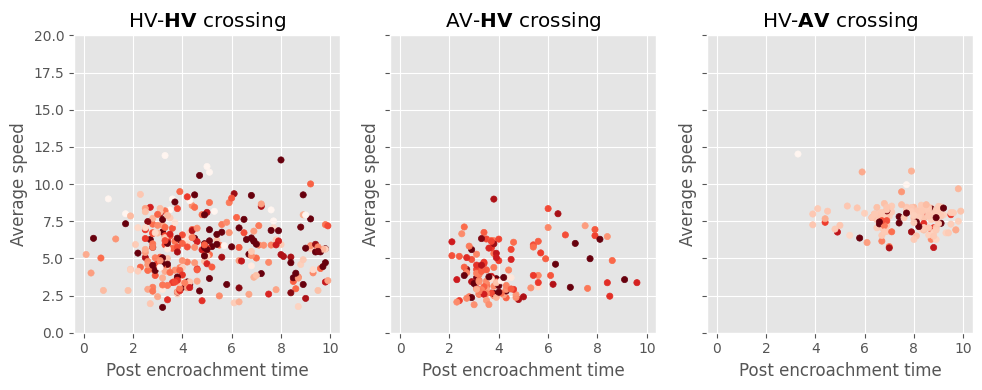

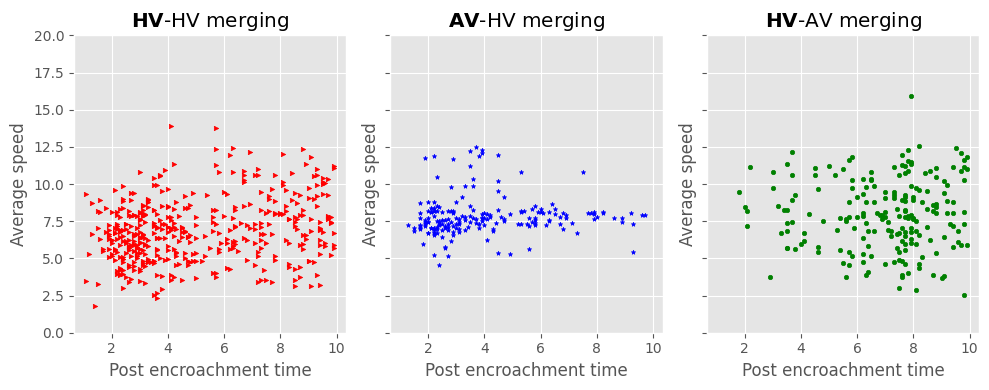

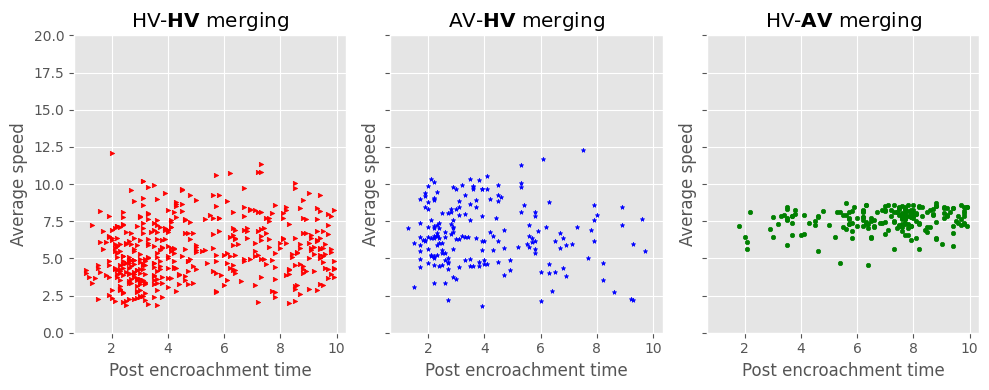

In [180]:
# Average speed
# crossing
# leader vehicle
fig, axs = plt.subplots(1, 3, figsize=(10, 4), sharey=True, sharex=True)

sca0 = axs[0].scatter(x=HVHV_PETs_cross, y=HVHV_average_speeds_first_cross, s=20, marker="o", c=HVHV_MRDs_cross, cmap="Reds", vmin=0, vmax=5)
sca1 = axs[1].scatter(x=AVHV_PETs_cross, y=AVHV_average_speeds_first_cross, s=20, marker="o", c=AVHV_MRDs_cross, cmap="Reds", vmin=0, vmax=5)
sca2 = axs[2].scatter(x=HVAV_PETs_cross, y=HVAV_average_speeds_first_cross, s=20, marker="o", c=HVAV_MRDs_cross, cmap="Reds", vmin=0, vmax=5)

axs[0].set_title(r"$\bf{HV}$-HV crossing")
axs[0].set_xlabel("Post encroachment time")
axs[0].set_ylabel("Average speed")
axs[0].set_ylim([0, 20])

axs[1].set_title(r"$\bf{AV}$-HV crossing")
axs[1].set_xlabel("Post encroachment time")
axs[1].set_ylabel("Average speed")

axs[2].set_title(r"$\bf{HV}$-AV crossing")
axs[2].set_xlabel("Post encroachment time")
axs[2].set_ylabel("Average speed")

plt.colorbar(sca0,ax=axs[0])
plt.colorbar(sca1,ax=axs[1])
plt.colorbar(sca2,ax=axs[2])
plt.tight_layout()
plt.show()

# Average speed
# crossing
# follower vehicle
fig, axs = plt.subplots(1, 3, figsize=(10, 4), sharey=True, sharex=True)

axs[0].scatter(x=HVHV_PETs_cross, y=HVHV_average_speeds_second_cross, s=20, marker="o", c=HVHV_MRDs_cross, cmap="Reds", vmin=0, vmax=5)
axs[1].scatter(x=AVHV_PETs_cross, y=AVHV_average_speeds_second_cross, s=20, marker="o", c=AVHV_MRDs_cross, cmap="Reds", vmin=0, vmax=5)
axs[2].scatter(x=HVAV_PETs_cross, y=HVAV_average_speeds_second_cross, s=20, marker="o", c=HVAV_MRDs_cross, cmap="Reds", vmin=0, vmax=5)

axs[0].set_title(r"HV-$\bf{HV}$ crossing")
axs[0].set_xlabel("Post encroachment time")
axs[0].set_ylabel("Average speed")
axs[0].set_ylim([0, 20])

axs[1].set_title(r"AV-$\bf{HV}$ crossing")
axs[1].set_xlabel("Post encroachment time")
axs[1].set_ylabel("Average speed")

axs[2].set_title(r"HV-$\bf{AV}$ crossing")
axs[2].set_xlabel("Post encroachment time")
axs[2].set_ylabel("Average speed")

plt.tight_layout()
plt.show()

# Average speed
# merging
# leader vehicle
fig, axs = plt.subplots(1, 3, figsize=(10, 4), sharey=True, sharex=True)

axs[0].scatter(x=HVHV_PETs_merge, y=HVHV_average_speeds_first_merge, s=10, marker=">", c='r')
axs[1].scatter(x=AVHV_PETs_merge, y=AVHV_average_speeds_first_merge, s=10, marker="*", c='b')
axs[2].scatter(x=HVAV_PETs_merge, y=HVAV_average_speeds_first_merge, s=10, marker="o", c='g')

axs[0].set_title(r"$\bf{HV}$-HV merging")
axs[0].set_xlabel("Post encroachment time")
axs[0].set_ylabel("Average speed")
axs[0].set_ylim([0, 20])

axs[1].set_title(r"$\bf{AV}$-HV merging")
axs[1].set_xlabel("Post encroachment time")
axs[1].set_ylabel("Average speed")

axs[2].set_title(r"$\bf{HV}$-AV merging")
axs[2].set_xlabel("Post encroachment time")
axs[2].set_ylabel("Average speed")

plt.tight_layout()
plt.show()

# Average speed
# merging
# follower vehicle
fig, axs = plt.subplots(1, 3, figsize=(10, 4), sharey=True, sharex=True)

axs[0].scatter(x=HVHV_PETs_merge, y=HVHV_average_speeds_second_merge, s=10, marker=">", c='r')
axs[1].scatter(x=AVHV_PETs_merge, y=AVHV_average_speeds_second_merge, s=10, marker="*", c='b')
axs[2].scatter(x=HVAV_PETs_merge, y=HVAV_average_speeds_second_merge, s=10, marker="o", c='g')

axs[0].set_title(r"HV-$\bf{HV}$ merging")
axs[0].set_xlabel("Post encroachment time")
axs[0].set_ylabel("Average speed")
axs[0].set_ylim([0, 20])

axs[1].set_title(r"AV-$\bf{HV}$ merging")
axs[1].set_xlabel("Post encroachment time")
axs[1].set_ylabel("Average speed")

axs[2].set_title(r"HV-$\bf{AV}$ merging")
axs[2].set_xlabel("Post encroachment time")
axs[2].set_ylabel("Average speed")

plt.tight_layout()
plt.show()

### `Speed at conflict point`

In [55]:
#******* HV-HV ******#
HVHV_speeds_first_at_conflict = []
HVHV_speeds_second_at_conflict = []
HVHV_PETs = []

HVHV_speeds_first_at_conflict_cross = []
HVHV_speeds_second_at_conflict_cross = []
HVHV_PETs_cross = []

HVHV_speeds_first_at_conflict_merge = []
HVHV_speeds_second_at_conflict_merge = []
HVHV_PETs_merge = []

dataset = HVHV_val_conflict_dataset
for category in dataset.keys():
    for direction in dataset[category].keys():
        for index, conflict in enumerate(dataset[category][direction]):
            conflict = list(conflict.values())[0]
            conflict = Conflict(
                first_trajectory=conflict.first_agent_trajectory,
                second_trajectory=conflict.second_agent_trajectory,
                is_first_AV = True if conflict.first_agent_trajectory_id is None else False,
                is_second_AV = True if conflict.second_agent_trajectory_id is None else False,
                PET = conflict.delta_time,
                first_time_at_conflict = conflict.first_agent_conflict_time,
                second_time_at_conflict = conflict.second_agent_conflict_time,
                type=category,
            )
            HVHV_speeds_first_at_conflict.append(conflict.first_veh_speed_at_conflict)
            HVHV_speeds_second_at_conflict.append(conflict.second_veh_speed_at_conflict)
            HVHV_PETs.append(conflict.PET)
            if category == "merge":
                HVHV_speeds_first_at_conflict_merge.append(conflict.first_veh_speed_at_conflict)
                HVHV_speeds_second_at_conflict_merge.append(conflict.second_veh_speed_at_conflict)
                HVHV_PETs_merge.append(conflict.PET)
            elif category == "cross":
                HVHV_speeds_first_at_conflict_cross.append(conflict.first_veh_speed_at_conflict)
                HVHV_speeds_second_at_conflict_cross.append(conflict.second_veh_speed_at_conflict)
                HVHV_PETs_cross.append(conflict.PET)
            
dataset = HVHV_train_conflict_dataset
for category in dataset.keys():
    for direction in dataset[category].keys():
        for index, conflict in enumerate(dataset[category][direction]):
            conflict = list(conflict.values())[0]
            conflict = Conflict(
                first_trajectory=conflict.first_agent_trajectory,
                second_trajectory=conflict.second_agent_trajectory,
                is_first_AV = True if conflict.first_agent_trajectory_id is None else False,
                is_second_AV = True if conflict.second_agent_trajectory_id is None else False,
                PET = conflict.delta_time,
                first_time_at_conflict = conflict.first_agent_conflict_time,
                second_time_at_conflict = conflict.second_agent_conflict_time,
                type=category,
            )
            HVHV_speeds_first_at_conflict.append(conflict.first_veh_speed_at_conflict)
            HVHV_speeds_second_at_conflict.append(conflict.second_veh_speed_at_conflict)
            HVHV_PETs.append(conflict.PET)
            if category == "merge":
                HVHV_speeds_first_at_conflict_merge.append(conflict.first_veh_speed_at_conflict)
                HVHV_speeds_second_at_conflict_merge.append(conflict.second_veh_speed_at_conflict)
                HVHV_PETs_merge.append(conflict.PET)
            elif category == "cross":
                HVHV_speeds_first_at_conflict_cross.append(conflict.first_veh_speed_at_conflict)
                HVHV_speeds_second_at_conflict_cross.append(conflict.second_veh_speed_at_conflict)
                HVHV_PETs_cross.append(conflict.PET)
                
# #******* AV-HV & HV-AV ******#
AVHV_speeds_first_at_conflict = []
AVHV_speeds_second_at_conflict = []
AVHV_PETs = []
HVAV_speeds_first_at_conflict = []
HVAV_speeds_second_at_conflict = []
HVAV_PETs = []

AVHV_speeds_first_at_conflict_cross = []
AVHV_speeds_second_at_conflict_cross = []
AVHV_PETs_cross = []
HVAV_speeds_first_at_conflict_cross = []
HVAV_speeds_second_at_conflict_cross = []
HVAV_PETs_cross = []

AVHV_speeds_first_at_conflict_merge = []
AVHV_speeds_second_at_conflict_merge = []
AVHV_PETs_merge = []
HVAV_speeds_first_at_conflict_merge = []
HVAV_speeds_second_at_conflict_merge = []
HVAV_PETs_merge = []

dataset = AVHV_val_conflict_dataset
for category in dataset.keys():
    for direction in dataset[category].keys():
        for index, conflict in enumerate(dataset[category][direction]):
            conflict = list(conflict.values())[0]
            conflict = Conflict(
                first_trajectory=conflict.first_agent_trajectory,
                second_trajectory=conflict.second_agent_trajectory,
                is_first_AV = True if conflict.first_agent_trajectory_id is None else False,
                is_second_AV = True if conflict.second_agent_trajectory_id is None else False,
                PET = conflict.delta_time,
                first_time_at_conflict = conflict.first_agent_conflict_time,
                second_time_at_conflict = conflict.second_agent_conflict_time,
                type=category,
            )
            if conflict.is_first_AV:
                AVHV_speeds_first_at_conflict.append(conflict.first_veh_speed_at_conflict)
                AVHV_speeds_second_at_conflict.append(conflict.second_veh_speed_at_conflict)
                AVHV_PETs.append(conflict.PET)
                if category == "merge":
                    AVHV_speeds_first_at_conflict_merge.append(conflict.first_veh_speed_at_conflict)
                    AVHV_speeds_second_at_conflict_merge.append(conflict.second_veh_speed_at_conflict)
                    AVHV_PETs_merge.append(conflict.PET)
                elif category == "cross":
                    AVHV_speeds_first_at_conflict_cross.append(conflict.first_veh_speed_at_conflict)
                    AVHV_speeds_second_at_conflict_cross.append(conflict.second_veh_speed_at_conflict)
                    AVHV_PETs_cross.append(conflict.PET)
            else:
                HVAV_speeds_first_at_conflict.append(conflict.first_veh_speed_at_conflict)
                HVAV_speeds_second_at_conflict.append(conflict.second_veh_speed_at_conflict)
                HVAV_PETs.append(conflict.PET)
                if category == "merge":
                    HVAV_speeds_first_at_conflict_merge.append(conflict.first_veh_speed_at_conflict)
                    HVAV_speeds_second_at_conflict_merge.append(conflict.second_veh_speed_at_conflict)
                    HVAV_PETs_merge.append(conflict.PET)
                elif category == "cross":
                    HVAV_speeds_first_at_conflict_cross.append(conflict.first_veh_speed_at_conflict)
                    HVAV_speeds_second_at_conflict_cross.append(conflict.second_veh_speed_at_conflict)
                    HVAV_PETs_cross.append(conflict.PET)
                    
dataset = AVHV_train_conflict_dataset
for category in dataset.keys():
    for direction in dataset[category].keys():
        for index, conflict in enumerate(dataset[category][direction]):
            conflict = list(conflict.values())[0]
            conflict = Conflict(
                first_trajectory=conflict.first_agent_trajectory,
                second_trajectory=conflict.second_agent_trajectory,
                is_first_AV = True if conflict.first_agent_trajectory_id is None else False,
                is_second_AV = True if conflict.second_agent_trajectory_id is None else False,
                PET = conflict.delta_time,
                first_time_at_conflict = conflict.first_agent_conflict_time,
                second_time_at_conflict = conflict.second_agent_conflict_time,
                type=category,
            )
            if conflict.is_first_AV:
                AVHV_speeds_first_at_conflict.append(conflict.first_veh_speed_at_conflict)
                AVHV_speeds_second_at_conflict.append(conflict.second_veh_speed_at_conflict)
                AVHV_PETs.append(conflict.PET)
                if category == "merge":
                    AVHV_speeds_first_at_conflict_merge.append(conflict.first_veh_speed_at_conflict)
                    AVHV_speeds_second_at_conflict_merge.append(conflict.second_veh_speed_at_conflict)
                    AVHV_PETs_merge.append(conflict.PET)
                elif category == "cross":
                    AVHV_speeds_first_at_conflict_cross.append(conflict.first_veh_speed_at_conflict)
                    AVHV_speeds_second_at_conflict_cross.append(conflict.second_veh_speed_at_conflict)
                    AVHV_PETs_cross.append(conflict.PET)
            else:
                HVAV_speeds_first_at_conflict.append(conflict.first_veh_speed_at_conflict)
                HVAV_speeds_second_at_conflict.append(conflict.second_veh_speed_at_conflict)
                HVAV_PETs.append(conflict.PET)
                if category == "merge":
                    HVAV_speeds_first_at_conflict_merge.append(conflict.first_veh_speed_at_conflict)
                    HVAV_speeds_second_at_conflict_merge.append(conflict.second_veh_speed_at_conflict)
                    HVAV_PETs_merge.append(conflict.PET)
                elif category == "cross":
                    HVAV_speeds_first_at_conflict_cross.append(conflict.first_veh_speed_at_conflict)
                    HVAV_speeds_second_at_conflict_cross.append(conflict.second_veh_speed_at_conflict)
                    HVAV_PETs_cross.append(conflict.PET)

#### `visualization`

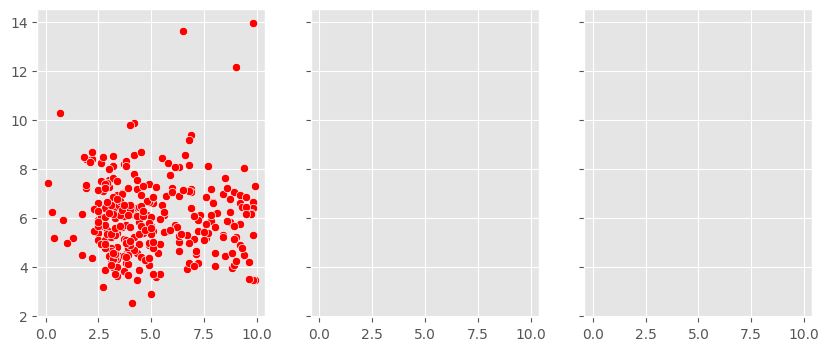

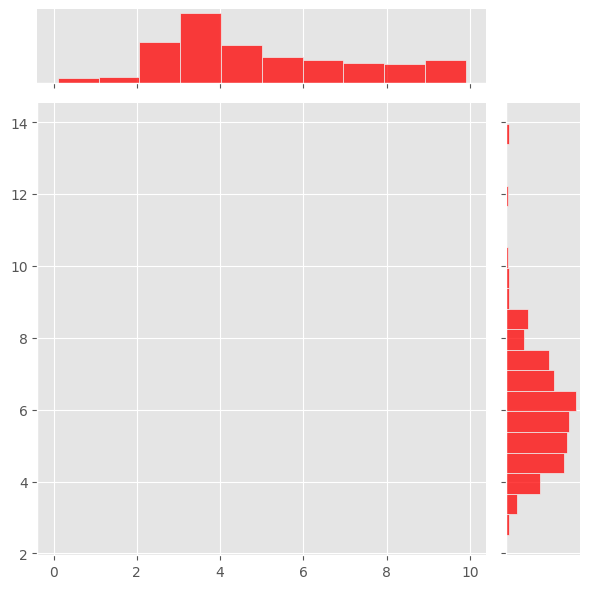

In [56]:
# Speed at conflict point
# crossing
# leader vehicle
fig, axs = plt.subplots(1, 3, figsize=(10, 4), sharey=True, sharex=True)

seaborn.jointplot(x=HVHV_PETs_cross, y=HVHV_speeds_first_at_conflict_cross, color='r', ax=axs[0])
# axs[1].scatter(x=AVHV_PETs_cross, y=AVHV_speeds_first_at_conflict_cross, s=10, marker="*", c='b')
# axs[2].scatter(x=HVAV_PETs_cross, y=HVAV_speeds_first_at_conflict_cross, s=10, marker="o", c='g')

# axs[0].set_title(r"$\bf{HV}$-HV crossing")
# axs[0].set_xlabel("Post encroachment time")
# axs[0].set_ylabel("Speed at conflict point")
# axs[0].set_ylim([0, 20])

# axs[1].set_title(r"$\bf{AV}$-HV crossing")
# axs[1].set_xlabel("Post encroachment time")
# axs[1].set_ylabel("Speed at conflict point")

# axs[2].set_title(r"$\bf{HV}$-AV crossing")
# axs[2].set_xlabel("Post encroachment time")
# axs[2].set_ylabel("Speed at conflict point")

plt.tight_layout()
plt.show()

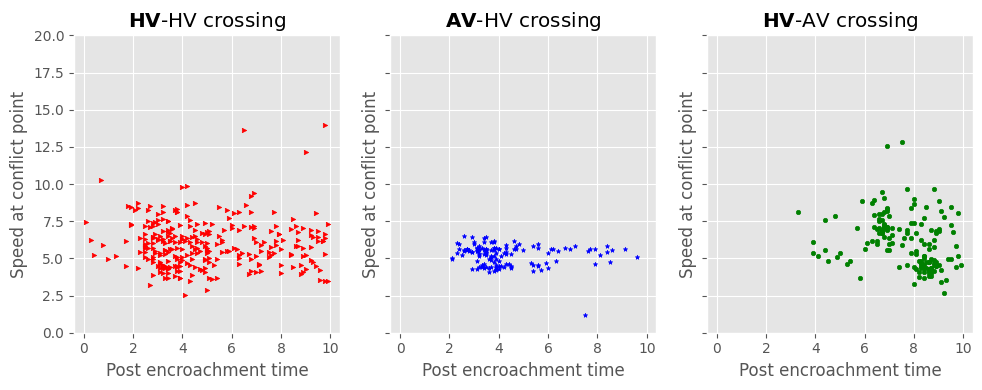

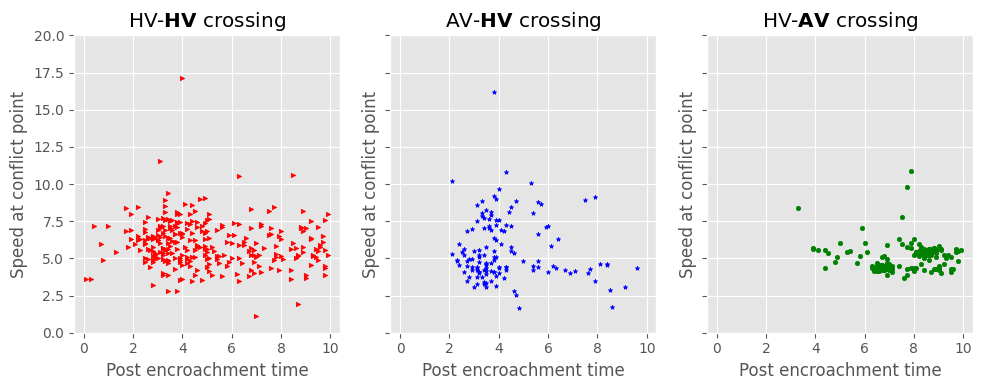

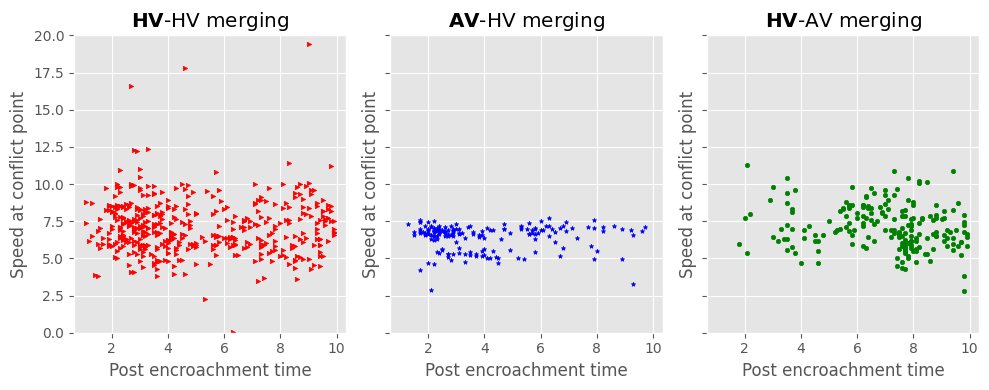

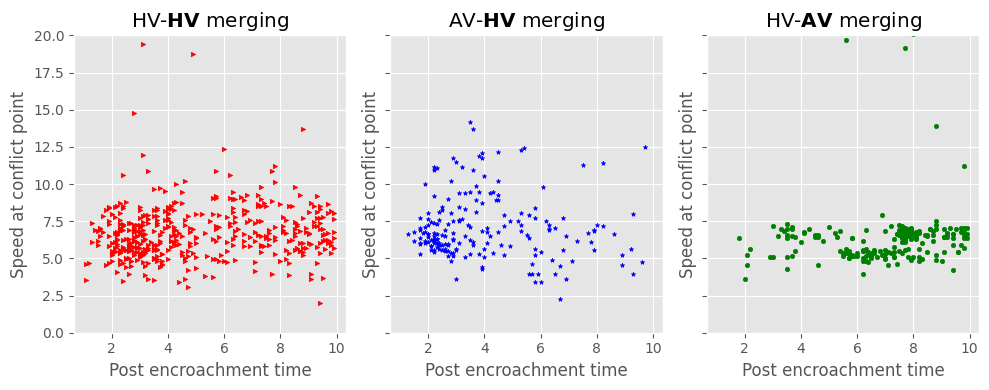

In [57]:
# Speed at conflict point
# crossing
# leader vehicle
fig, axs = plt.subplots(1, 3, figsize=(10, 4), sharey=True, sharex=True)

axs[0].scatter(x=HVHV_PETs_cross, y=HVHV_speeds_first_at_conflict_cross, s=10, marker=">", c='r')
axs[1].scatter(x=AVHV_PETs_cross, y=AVHV_speeds_first_at_conflict_cross, s=10, marker="*", c='b')
axs[2].scatter(x=HVAV_PETs_cross, y=HVAV_speeds_first_at_conflict_cross, s=10, marker="o", c='g')

axs[0].set_title(r"$\bf{HV}$-HV crossing")
axs[0].set_xlabel("Post encroachment time")
axs[0].set_ylabel("Speed at conflict point")
axs[0].set_ylim([0, 20])

axs[1].set_title(r"$\bf{AV}$-HV crossing")
axs[1].set_xlabel("Post encroachment time")
axs[1].set_ylabel("Speed at conflict point")

axs[2].set_title(r"$\bf{HV}$-AV crossing")
axs[2].set_xlabel("Post encroachment time")
axs[2].set_ylabel("Speed at conflict point")

plt.tight_layout()
plt.show()


# Speed at conflict point
# crossing
# follower vehicle
fig, axs = plt.subplots(1, 3, figsize=(10, 4), sharey=True, sharex=True)

axs[0].scatter(x=HVHV_PETs_cross, y=HVHV_speeds_second_at_conflict_cross, s=10, marker=">", c='r')
axs[1].scatter(x=AVHV_PETs_cross, y=AVHV_speeds_second_at_conflict_cross, s=10, marker="*", c='b')
axs[2].scatter(x=HVAV_PETs_cross, y=HVAV_speeds_second_at_conflict_cross, s=10, marker="o", c='g')

axs[0].set_title(r"HV-$\bf{HV}$ crossing")
axs[0].set_xlabel("Post encroachment time")
axs[0].set_ylabel("Speed at conflict point")
axs[0].set_ylim([0, 20])

axs[1].set_title(r"AV-$\bf{HV}$ crossing")
axs[1].set_xlabel("Post encroachment time")
axs[1].set_ylabel("Speed at conflict point")

axs[2].set_title(r"HV-$\bf{AV}$ crossing")
axs[2].set_xlabel("Post encroachment time")
axs[2].set_ylabel("Speed at conflict point")

plt.tight_layout()
plt.show()

# Speed at conflict point
# merging
# leader vehicle
fig, axs = plt.subplots(1, 3, figsize=(10, 4), sharey=True, sharex=True)

axs[0].scatter(x=HVHV_PETs_merge, y=HVHV_speeds_first_at_conflict_merge, s=10, marker=">", c='r')
axs[1].scatter(x=AVHV_PETs_merge, y=AVHV_speeds_first_at_conflict_merge, s=10, marker="*", c='b')
axs[2].scatter(x=HVAV_PETs_merge, y=HVAV_speeds_first_at_conflict_merge, s=10, marker="o", c='g')

axs[0].set_title(r"$\bf{HV}$-HV merging")
axs[0].set_xlabel("Post encroachment time")
axs[0].set_ylabel("Speed at conflict point")
axs[0].set_ylim([0, 20])

axs[1].set_title(r"$\bf{AV}$-HV merging")
axs[1].set_xlabel("Post encroachment time")
axs[1].set_ylabel("Speed at conflict point")

axs[2].set_title(r"$\bf{HV}$-AV merging")
axs[2].set_xlabel("Post encroachment time")
axs[2].set_ylabel("Speed at conflict point")

plt.tight_layout()
plt.show()

# Speed at conflict point
# merging
# follower vehicle
fig, axs = plt.subplots(1, 3, figsize=(10, 4), sharey=True, sharex=True)

axs[0].scatter(x=HVHV_PETs_merge, y=HVHV_speeds_second_at_conflict_merge, s=10, marker=">", c='r')
axs[1].scatter(x=AVHV_PETs_merge, y=AVHV_speeds_second_at_conflict_merge, s=10, marker="*", c='b')
axs[2].scatter(x=HVAV_PETs_merge, y=HVAV_speeds_second_at_conflict_merge, s=10, marker="o", c='g')

axs[0].set_title(r"HV-$\bf{HV}$ merging")
axs[0].set_xlabel("Post encroachment time")
axs[0].set_ylabel("Speed at conflict point")
axs[0].set_ylim([0, 20])

axs[1].set_title(r"AV-$\bf{HV}$ merging")
axs[1].set_xlabel("Post encroachment time")
axs[1].set_ylabel("Speed at conflict point")

axs[2].set_title(r"HV-$\bf{AV}$ merging")
axs[2].set_xlabel("Post encroachment time")
axs[2].set_ylabel("Speed at conflict point")

plt.tight_layout()
plt.show()

### `Visualization`

In [58]:
# # First vehicle

# # Speed at the conflict point 
# plt.figure(figsize=(4,4))
# plt.scatter(x=HVHV_PETs, y=HVHV_speeds_first_at_conflict, s=5)
# plt.scatter(x=AVHV_PETs, y=AVHV_speeds_first_at_conflict, s=10, marker="*")
# plt.scatter(x=HVAV_PETs, y=HVAV_speeds_first_at_conflict, s=10, marker="o")
# plt.ylim([0, 15])
# plt.xlabel("Post encroachment time")
# plt.ylabel("Speed at the conflict point")
# plt.title("First vehicle arriving at the conflict point")
# plt.legend([
#     "HV-HV", 
#     "AV-HV", "HV-AV"])
# plt.show()

# # Average speed
# plt.figure(figsize=(4,4))
# plt.scatter(x=HVHV_PETs, y=HVHV_average_speeds_first, s=5)
# plt.scatter(x=AVHV_PETs, y=AVHV_average_speeds_first, s=10, marker="*")
# plt.scatter(x=HVAV_PETs, y=HVAV_average_speeds_first, s=10, marker="o")
# plt.ylim([0, 15])
# plt.xlabel("Post encroachment time")
# plt.ylabel("Average speed")
# plt.title("First vehicle arriving at the conflict point")
# plt.legend([
#     "HV-HV", 
#     "AV-HV", "HV-AV"])
# plt.show()

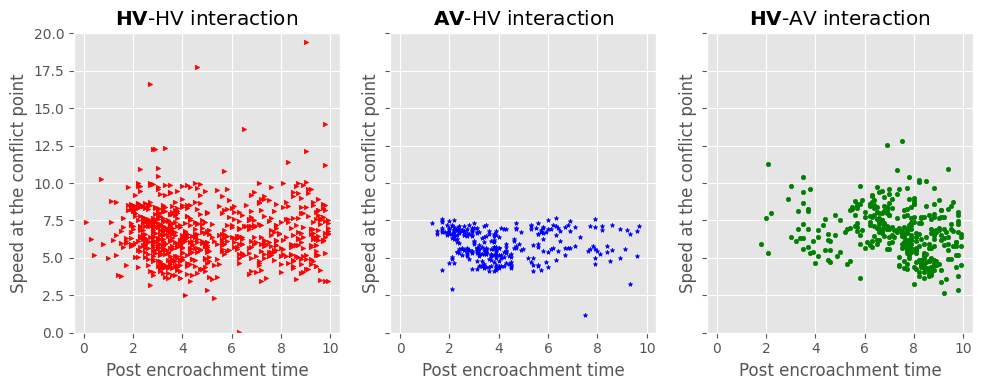

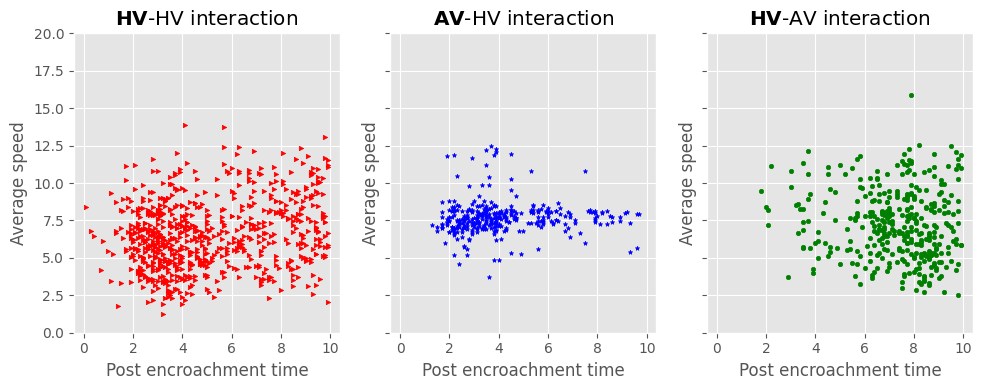

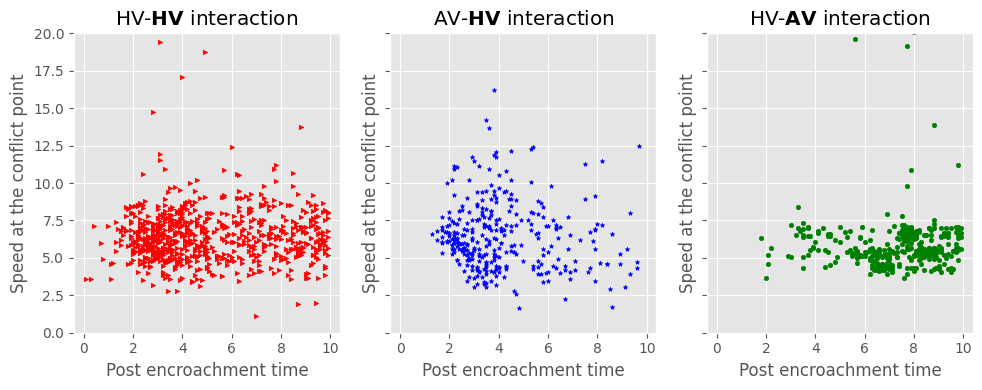

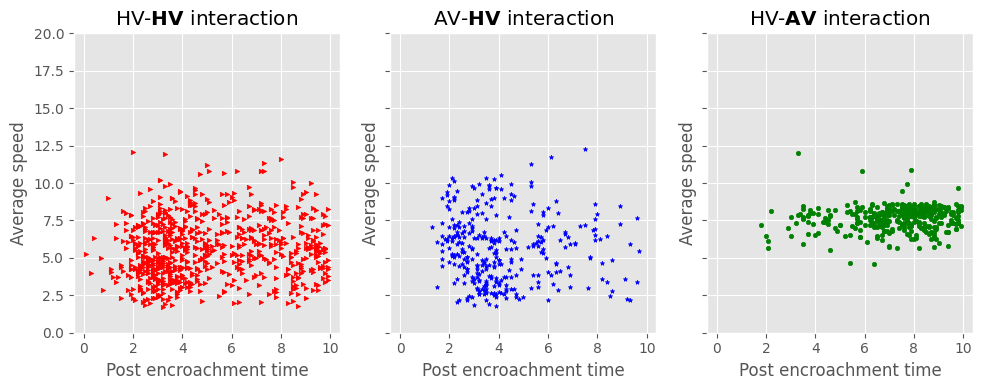

In [59]:
# First vehicle

# Speed at the conflict point 
fig, axs = plt.subplots(1, 3, figsize=(10, 4), sharey=True, sharex=True)

axs[0].scatter(x=HVHV_PETs, y=HVHV_speeds_first_at_conflict, s=10, marker=">", c='r')
axs[1].scatter(x=AVHV_PETs, y=AVHV_speeds_first_at_conflict, s=10, marker="*", c='b')
axs[2].scatter(x=HVAV_PETs, y=HVAV_speeds_first_at_conflict, s=10, marker="o", c='g')

axs[0].set_title(r"$\bf{HV}$-HV interaction")
axs[0].set_xlabel("Post encroachment time")
axs[0].set_ylabel("Speed at the conflict point")
axs[0].set_ylim([0, 20])

axs[1].set_title(r"$\bf{AV}$-HV interaction")
axs[1].set_xlabel("Post encroachment time")
axs[1].set_ylabel("Speed at the conflict point")

axs[2].set_title(r"$\bf{HV}$-AV interaction")
axs[2].set_xlabel("Post encroachment time")
axs[2].set_ylabel("Speed at the conflict point")

plt.tight_layout()
plt.show()

# Average speed
fig, axs = plt.subplots(1, 3, figsize=(10, 4), sharey=True, sharex=True)

axs[0].scatter(x=HVHV_PETs, y=HVHV_average_speeds_first, s=10, marker=">", c='r')
axs[1].scatter(x=AVHV_PETs, y=AVHV_average_speeds_first, s=10, marker="*", c='b')
axs[2].scatter(x=HVAV_PETs, y=HVAV_average_speeds_first, s=10, marker="o", c='g')

axs[0].set_title(r"$\bf{HV}$-HV interaction")
axs[0].set_xlabel("Post encroachment time")
axs[0].set_ylabel("Average speed")
axs[0].set_ylim([0, 20])

axs[1].set_title(r"$\bf{AV}$-HV interaction")
axs[1].set_xlabel("Post encroachment time")
axs[1].set_ylabel("Average speed")

axs[2].set_title(r"$\bf{HV}$-AV interaction")
axs[2].set_xlabel("Post encroachment time")
axs[2].set_ylabel("Average speed")

plt.tight_layout()
plt.show()

# Second vehicle

# Speed at the conflict point
fig, axs = plt.subplots(1, 3, figsize=(10, 4), sharey=True, sharex=True)

axs[0].scatter(x=HVHV_PETs, y=HVHV_speeds_second_at_conflict, s=10, marker=">", c='r')
axs[1].scatter(x=AVHV_PETs, y=AVHV_speeds_second_at_conflict, s=10, marker="*", c='b')
axs[2].scatter(x=HVAV_PETs, y=HVAV_speeds_second_at_conflict, s=10, marker="o", c='g')

axs[0].set_title(r"HV-$\bf{HV}$ interaction")
axs[0].set_xlabel("Post encroachment time")
axs[0].set_ylabel("Speed at the conflict point")
axs[0].set_ylim([0, 20])

axs[1].set_title(r"AV-$\bf{HV}$ interaction")
axs[1].set_xlabel("Post encroachment time")
axs[1].set_ylabel("Speed at the conflict point")

axs[2].set_title(r"HV-$\bf{AV}$ interaction")
axs[2].set_xlabel("Post encroachment time")
axs[2].set_ylabel("Speed at the conflict point")

plt.tight_layout()
plt.show()


# Average speed
fig, axs = plt.subplots(1, 3, figsize=(10, 4), sharey=True, sharex=True)

axs[0].scatter(x=HVHV_PETs, y=HVHV_average_speeds_second, s=10, marker=">", c='r')
axs[1].scatter(x=AVHV_PETs, y=AVHV_average_speeds_second, s=10, marker="*", c='b')
axs[2].scatter(x=HVAV_PETs, y=HVAV_average_speeds_second, s=10, marker="o", c='g')

axs[0].set_title(r"HV-$\bf{HV}$ interaction")
axs[0].set_xlabel("Post encroachment time")
axs[0].set_ylabel("Average speed")
axs[0].set_ylim([0, 20])

axs[1].set_title(r"AV-$\bf{HV}$ interaction")
axs[1].set_xlabel("Post encroachment time")
axs[1].set_ylabel("Average speed")

axs[2].set_title(r"HV-$\bf{AV}$ interaction")
axs[2].set_xlabel("Post encroachment time")
axs[2].set_ylabel("Average speed")

plt.tight_layout()
plt.show()

In [60]:
# # Second vehicle

# # Speed at the conflict point
# plt.figure(figsize=(4,4))
# plt.scatter(x=HVHV_PETs, y=HVHV_speeds_second_at_conflict, s=10, marker=">")
# plt.scatter(x=AVHV_PETs, y=AVHV_speeds_second_at_conflict, s=10, marker="*")
# plt.scatter(x=HVAV_PETs, y=HVAV_speeds_second_at_conflict, s=10, marker="o")
# plt.xlabel("Post encroachment time")
# plt.ylabel("Speed at the conflict point")
# plt.title("Second vehicle arriving at the conflict point")
# plt.legend([
#     "HV-HV", 
#     "AV-HV", 
#     "HV-AV"
# ])
# plt.show()


# # Average speed
# plt.figure(figsize=(4,4))
# plt.scatter(x=HVHV_PETs, y=HVHV_average_speeds_second, s=10, marker=">")
# plt.scatter(x=AVHV_PETs, y=AVHV_average_speeds_second, s=10, marker="*")
# plt.scatter(x=HVAV_PETs, y=HVAV_average_speeds_second, s=10, marker="o")
# plt.xlabel("Post encroachment time")
# plt.ylabel("Average speed")
# plt.title("Second vehicle arriving at the conflict point")
# plt.legend([
#     "HV-HV", 
#     "AV-HV", 
#     "HV-AV"
# ])
# plt.show()

In [61]:
# # Second vehicle

# # Speed at the conflict point
# fig, axs = plt.subplots(1, 3, figsize=(10, 4), sharey=True, sharex=True)

# seaborn.histplot(x=HVHV_PETs, y=HVHV_speeds_second_at_conflict, ax=axs[0], bins=30)
# seaborn.histplot(x=AVHV_PETs, y=AVHV_speeds_second_at_conflict, ax=axs[1], bins=30)
# seaborn.histplot(x=HVAV_PETs, y=HVAV_speeds_second_at_conflict, ax=axs[2], bins=30)

# axs[0].set_title(r"HV-$\bf{HV}$ interaction")
# axs[0].set_xlabel("Post encroachment time")
# axs[0].set_ylabel("Speed at the conflict point")
# axs[0].set_ylim([0, 20])

# axs[1].set_title(r"AV-$\bf{HV}$ interaction")
# axs[1].set_xlabel("Post encroachment time")
# axs[1].set_ylabel("Speed at the conflict point")

# axs[2].set_title(r"HV-$\bf{AV}$ interaction")
# axs[2].set_xlabel("Post encroachment time")
# axs[2].set_ylabel("Speed at the conflict point")

# plt.tight_layout()
# plt.show()


# # Average speed
# fig, axs = plt.subplots(1, 3, figsize=(10, 4), sharey=True, sharex=True)

# seaborn.histplot(x=HVHV_PETs, y=HVHV_average_speeds_second, ax=axs[0], bins=30)
# seaborn.histplot(x=AVHV_PETs, y=AVHV_average_speeds_second, ax=axs[1], bins=30)
# seaborn.histplot(x=HVAV_PETs, y=HVAV_average_speeds_second, ax=axs[2], bins=30)

# axs[0].set_title(r"HV-$\bf{HV}$ interaction")
# axs[0].set_xlabel("Post encroachment time")
# axs[0].set_ylabel("Average speed")
# axs[0].set_ylim([0, 20])

# axs[1].set_title(r"AV-$\bf{HV}$ interaction")
# axs[1].set_xlabel("Post encroachment time")
# axs[1].set_ylabel("Average speed")

# axs[2].set_title(r"HV-$\bf{AV}$ interaction")
# axs[2].set_xlabel("Post encroachment time")
# axs[2].set_ylabel("Average speed")

# plt.tight_layout()
# plt.show()

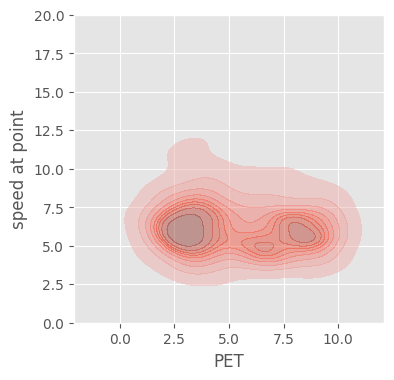

In [68]:
HVHV_second = pd.DataFrame({
    "average speeds": HVHV_average_speeds_second,
    "speed at point": HVHV_speeds_second_at_conflict,
    "PET" : HVHV_PETs,
})
HVHV_second["class"] = "HVHV"
AVHV_second = pd.DataFrame({
    "average speeds": AVHV_average_speeds_second,
    "speed at point": AVHV_speeds_second_at_conflict,
    "PET" : AVHV_PETs,
})
AVHV_second["class"] = "AVHV"
HVAV_second = pd.DataFrame({
    "average speeds": HVAV_average_speeds_second,
    "speed at point": HVAV_speeds_second_at_conflict,
    "PET" : HVAV_PETs,
})
HVAV_second["class"] = "HVAV"
second = pd.concat([HVHV_second, AVHV_second, HVAV_second])

# plt.figure(figsize=(4,4))
# seaborn.histplot(
#     data=second,
#     x="PET", 
#     y="average speeds",
#     hue="class",
#     bins=45,
# )
# plt.ylim([0,15])
# plt.show()

# plt.figure(figsize=(4,4))
# seaborn.histplot(
#     data=second,
#     x="PET", 
#     y="speed at point",
#     hue="class",
#     bins=45,
# )
# plt.ylim([0,20])
# plt.show()

# plt.figure(figsize=(4,4))
# seaborn.kdeplot(
#     data=second,
#     x="PET", 
#     y="average speeds",
#     hue="class",
#     fill=True,
#     alpha=.5,
# )
# plt.ylim([0,15])
# plt.show()

plt.figure(figsize=(4,4))
seaborn.kdeplot(
    data=second,
    x="PET", 
    y="speed at point",
    # hue="class",
    fill=True,
    alpha=.5,
)
plt.ylim([0,20])
plt.show()